# Read dataset 
imageio package is used for read tiff picture
seaborn package is a advanced matplotlib package for figure

In [3]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import imageio #这个东西是用来读取tiff图片得
import seaborn as sns
import time   #时间相关的

plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
path = os.path.abspath(os.path.dirname(os.getcwd()) + os.path.sep + ".")
raw_data_point = path+'\LSM\PointData'     #这个是用来读取点数据路径得
raw_data_raster = path+'\LSM\RasterData'   #这个是用来读取像素数据得

In [4]:
start = time.time()

img_n = 0
for lists in os.listdir(raw_data_raster):
    sub_path = os.path.join(raw_data_raster, lists)
    if os.path.isfile(sub_path):
        img_n = img_n+1
# 这是用来判断有多少的图片需要读取

img_size = (imageio.imread(raw_data_raster + r'\a0.tif')).shape
print('The size of image file is:',img_size,'The number of files is',img_n)

All_data = pd.DataFrame()
for i in range(img_n):   #这个表示了我们总共有21个输入玩意
    img_temp = imageio.imread(raw_data_raster + r'\a'+str(i)+'.tif')
    All_data['A'+str(i)] = img_temp.flatten()
    
for var in All_data.columns:# 这个部分主要是为了删除含有空值的玩意,~ 是为了取反值
    All_data=All_data[~All_data[var].isin([65535])]

All_data.to_csv('Raster10m.csv')
end = time.time()
print('run time =',round(end-start,2),'s')

The size of image file is: (4765, 4485) The number of files is 21
run time = 285.79 s


In [5]:
All_dataPx1 = pd.read_csv('Raster10m.csv',encoding='utf-8',delimiter=',')
print('(Po1) No HLS samples:',All_dataPx1['A0'].value_counts()[0],'HLS samples:',All_dataPx1['A0'].value_counts()[1])
print('(Po1) No ELS samples:',All_dataPx1['A1'].value_counts()[0],'ELS samples:',All_dataPx1['A1'].value_counts()[1])
print('Raw shape of Px1 is',len(All_dataPx1))
del All_dataPx1

(Po1) No HLS samples: 10835392 HLS samples: 698646
(Po1) No ELS samples: 11158694 ELS samples: 375344
Raw shape of Px1 is 11534038


In [44]:
All_dataPo1 = pd.read_csv(raw_data_point + '\PointValue0.csv',encoding='utf-8',delimiter=',')   #这是读取点数据的示范
All_dataPo2 = pd.read_csv(raw_data_point + '\PointValue1.csv',encoding='utf-8',delimiter=',')   #这是读取点数据的示范
All_dataPo3 = pd.read_csv(raw_data_point + '\PointValue2.csv',encoding='utf-8',delimiter=',')   #这是读取点数据的示范

old_1 = len(All_dataPo1) ; old_2  = len(All_dataPo2) ; old_3  = len(All_dataPo3) 

All_dataPo1.dropna(axis=0, how='any', inplace=True)
All_dataPo2.dropna(axis=0, how='any', inplace=True)
All_dataPo3.dropna(axis=0, how='any', inplace=True)

new_1 = len(All_dataPo1) ; new_2  = len(All_dataPo2) ; new_3  = len(All_dataPo3) 

print('Raw shape of Po1 is',old_1,'New:',new_1,'delete',old_1-new_1,'rows')
print('Raw shape of Po1 is',old_2,'New:',new_2,'delete',old_2-new_2,'rows')
print('Raw shape of Po1 is',old_3,'New:',new_3,'delete',old_3-new_3,'rows')

Raw shape of Po1 is 500000 New: 497876 delete 2124 rows
Raw shape of Po1 is 121534 New: 121253 delete 281 rows
Raw shape of Po1 is 18083 New: 18043 delete 40 rows


In [45]:
print("-----------------------Histroical landslides--------------------------------")
print('(Po1) No HLS samples:',All_dataPo1['A0'].value_counts()[0],'HLS samples:',All_dataPo1['A0'].value_counts()[1])
print('(Po2) No HLS samples:',All_dataPo2['A0'].value_counts()[0],'HLS samples:',All_dataPo2['A0'].value_counts()[1])
print('(Po3) No HLS samples:',All_dataPo3['A0'].value_counts()[0],'HLS samples:',All_dataPo3['A0'].value_counts()[1])
print("-----------------------Earthquake-induced landslides--------------------------------")
print('(Po1) No ELS samples:',All_dataPo1['A1'].value_counts()[0],'ELS samples:',All_dataPo1['A1'].value_counts()[1])
print('(Po2) No ELS samples:',All_dataPo2['A1'].value_counts()[0],'ELS samples:',All_dataPo2['A1'].value_counts()[1])
print('(Po3) No ELS samples:',All_dataPo3['A1'].value_counts()[0],'ELS samples:',All_dataPo3['A1'].value_counts()[1])

-----------------------Histroical landslides--------------------------------
(Po1) No HLS samples: 467435 HLS samples: 30441
(Po2) No HLS samples: 83535 HLS samples: 37718
(Po3) No HLS samples: 15993 HLS samples: 2050
-----------------------Earthquake-induced landslides--------------------------------
(Po1) No ELS samples: 481403 ELS samples: 16473
(Po2) No ELS samples: 99345 ELS samples: 21908
(Po3) No ELS samples: 11845 ELS samples: 6198


## Point sampling map

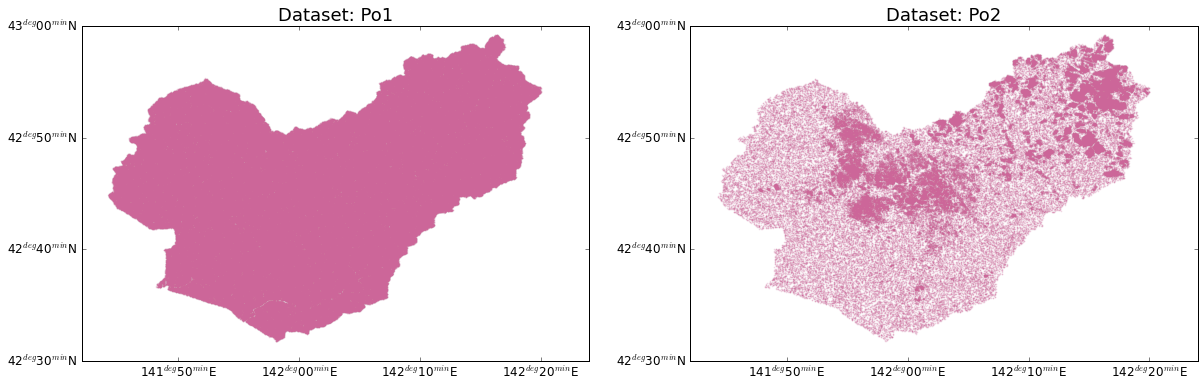

In [65]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.title('Dataset: Po1',fontsize=18)
plt.scatter(All_dataPo1.XCoord,All_dataPo1.YCoord,marker = 'o', color = '#CC6699' ,label ='No HLS samples', s = 0.5, alpha = 1/5);

plt.xticks(np.linspace(141.5,142.5,7),
           ['141$^{deg}$30$^{min}$E','141$^{deg}$40$^{min}$E','141$^{deg}$50$^{min}$E',
            '142$^{deg}$00$^{min}$E','142$^{deg}$10$^{min}$E','142$^{deg}$20$^{min}$E','142$^{deg}$30$^{min}$E'],fontsize=12);
plt.xlim(141.7,142.4)

plt.ylim(42.5,43.0)
plt.yticks(np.linspace(42.5,43.0,4),
           ['42$^{deg}$30$^{min}$N','42$^{deg}$40$^{min}$N','42$^{deg}$50$^{min}$N','43$^{deg}$00$^{min}$N'],fontsize=12);



plt.subplot(1,2,2)
plt.title('Dataset: Po2',fontsize=18)
plt.scatter(All_dataPo2.XCoord,All_dataPo2.YCoord,marker = 'o', color = '#CC6699' ,label ='No HLS samples', s = 0.5, alpha = 1/5);

plt.xticks(np.linspace(141.5,142.5,7),
           ['141$^{deg}$30$^{min}$E','141$^{deg}$40$^{min}$E','141$^{deg}$50$^{min}$E',
            '142$^{deg}$00$^{min}$E','142$^{deg}$10$^{min}$E','142$^{deg}$20$^{min}$E','142$^{deg}$30$^{min}$E'],fontsize=12);
plt.xlim(141.7,142.4)

plt.ylim(42.5,43.0)
plt.yticks(np.linspace(42.5,43.0,4),
           ['42$^{deg}$30$^{min}$N','42$^{deg}$40$^{min}$N','42$^{deg}$50$^{min}$N','43$^{deg}$00$^{min}$N'],fontsize=12);



## sigmoid/LR diagram

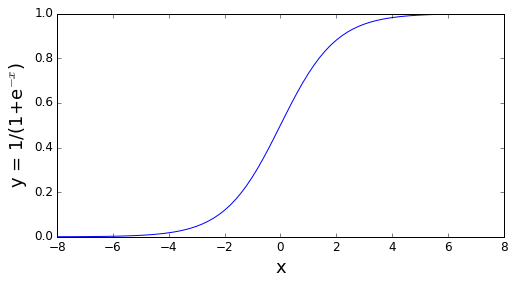

In [79]:
def sigmoid(x):
 
    y=1/(1+np.exp(-x))
    #dy=y*(1-y)
    return y

x = np.arange(-8, 8, 0.2)
y = sigmoid(x)
plt.figure(figsize=(8,4))

plt.plot(x, y)

plt.xlabel("x",fontsize=18)
plt.xticks(fontsize=12)
plt.ylabel("y = 1/(1+e$^{-x}$)",fontsize=18)
plt.yticks(fontsize=12)

plt.show()

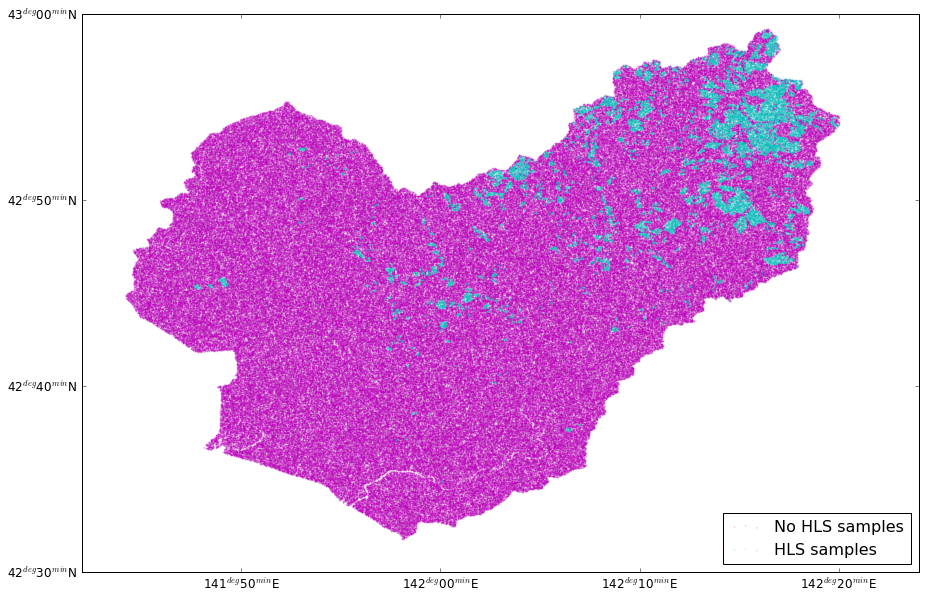

In [8]:
NO_HLS = All_dataPo1[All_dataPo1['A0']==0]
HAVE_HLS = All_dataPo1[All_dataPo1['A0']==1]

plt.figure(figsize=(15,10))
plt.scatter(NO_HLS.XCoord,NO_HLS.YCoord,marker = 'o', color = 'm' ,label ='No HLS samples', s = 0.5, alpha = 1/5);
plt.scatter(HAVE_HLS.XCoord,HAVE_HLS.YCoord,marker = 'o', color = 'c' ,label ='HLS samples', s = 0.5, alpha = 1/5);

plt.xticks(np.linspace(141.5,142.5,7),
           ['141$^{deg}$30$^{min}$E','141$^{deg}$40$^{min}$E','141$^{deg}$50$^{min}$E',
            '142$^{deg}$00$^{min}$E','142$^{deg}$10$^{min}$E','142$^{deg}$20$^{min}$E','142$^{deg}$30$^{min}$E'],fontsize=12);
plt.xlim(141.7,142.4)

plt.ylim(42.5,43.0)
plt.yticks(np.linspace(42.5,43.0,4),
           ['42$^{deg}$30$^{min}$N','42$^{deg}$40$^{min}$N','42$^{deg}$50$^{min}$N','43$^{deg}$00$^{min}$N'],fontsize=12);

plt.legend(loc = 'lower right',fontsize=16);
plt.show()

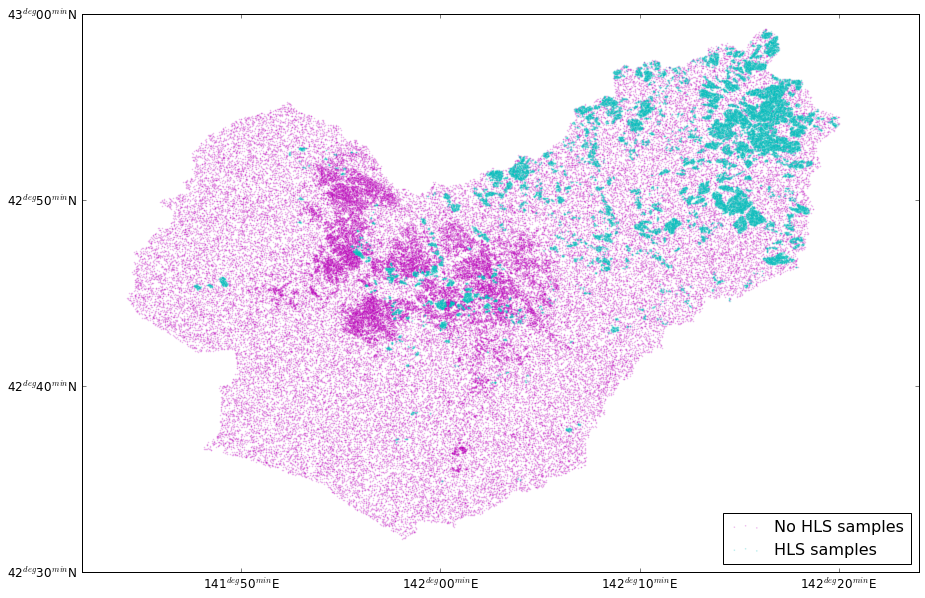

In [9]:
NO_HLS = All_dataPo2[All_dataPo2['A0']==0]
HAVE_HLS = All_dataPo2[All_dataPo2['A0']==1]

plt.figure(figsize=(15,10))
plt.scatter(NO_HLS.XCoord,NO_HLS.YCoord,marker = 'o', color = 'm' ,label ='No HLS samples', s = 0.5, alpha = 1/5);
plt.scatter(HAVE_HLS.XCoord,HAVE_HLS.YCoord,marker = 'o', color = 'c' ,label ='HLS samples', s = 0.5, alpha = 1/5);

plt.xticks(np.linspace(141.5,142.5,7),
           ['141$^{deg}$30$^{min}$E','141$^{deg}$40$^{min}$E','141$^{deg}$50$^{min}$E',
            '142$^{deg}$00$^{min}$E','142$^{deg}$10$^{min}$E','142$^{deg}$20$^{min}$E','142$^{deg}$30$^{min}$E'],fontsize=12);
plt.xlim(141.7,142.4)

plt.ylim(42.5,43.0)
plt.yticks(np.linspace(42.5,43.0,4),
           ['42$^{deg}$30$^{min}$N','42$^{deg}$40$^{min}$N','42$^{deg}$50$^{min}$N','43$^{deg}$00$^{min}$N'],fontsize=12);

plt.legend(loc = 'lower right',fontsize=16);
plt.show()

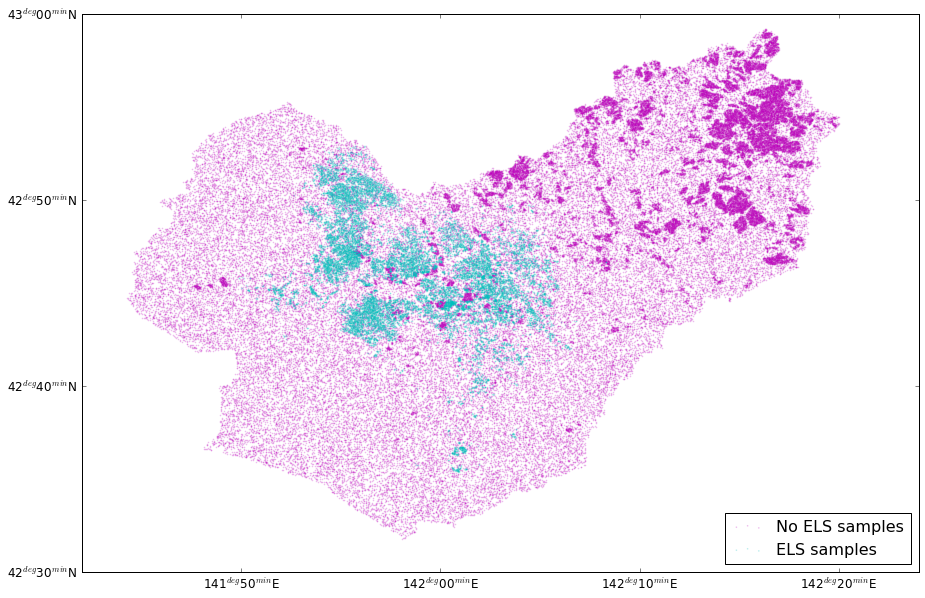

In [52]:
NO_HLS = All_dataPo2[All_dataPo2['A1']==0]
HAVE_HLS = All_dataPo2[All_dataPo2['A1']==1]

plt.figure(figsize=(15,10))
plt.scatter(NO_HLS.XCoord,NO_HLS.YCoord,marker = 'o', color = 'm' ,label ='No ELS samples', s = 0.5, alpha = 1/5);
plt.scatter(HAVE_HLS.XCoord,HAVE_HLS.YCoord,marker = 'o', color = 'c' ,label ='ELS samples', s = 0.5, alpha = 1/5);

plt.xticks(np.linspace(141.5,142.5,7),
           ['141$^{deg}$30$^{min}$E','141$^{deg}$40$^{min}$E','141$^{deg}$50$^{min}$E',
            '142$^{deg}$00$^{min}$E','142$^{deg}$10$^{min}$E','142$^{deg}$20$^{min}$E','142$^{deg}$30$^{min}$E'],fontsize=12);
plt.xlim(141.7,142.4)

plt.ylim(42.5,43.0)
plt.yticks(np.linspace(42.5,43.0,4),
           ['42$^{deg}$30$^{min}$N','42$^{deg}$40$^{min}$N','42$^{deg}$50$^{min}$N','43$^{deg}$00$^{min}$N'],fontsize=12);

plt.legend(loc = 'lower right',fontsize=16);
plt.show()

## Regression tree diagram

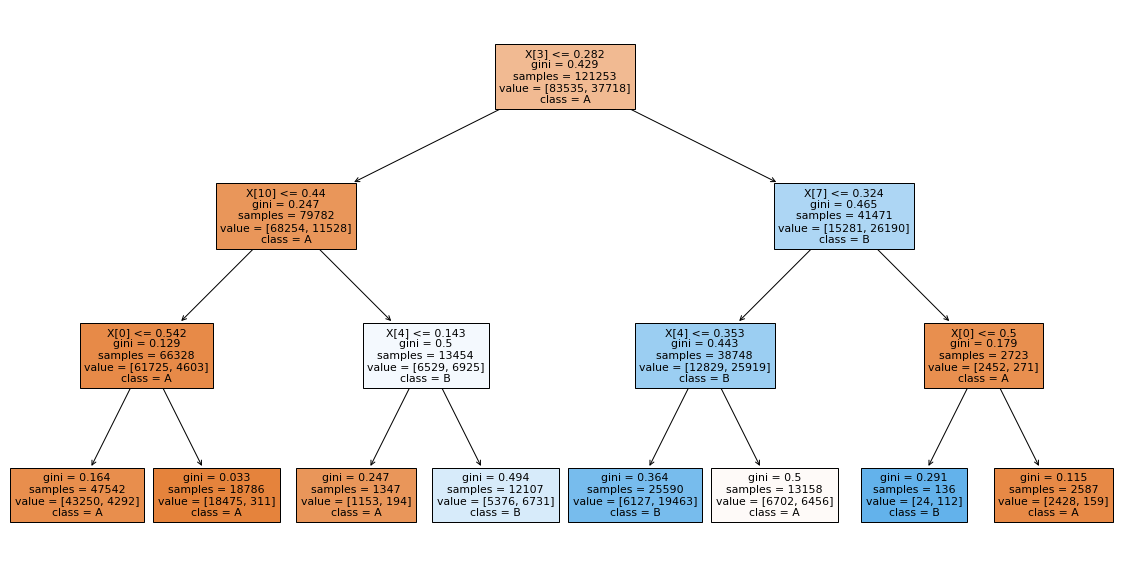

In [88]:
tree_params ={'criterion':'gini',
              'splitter':'best',
              'random_state':SEED,
              'max_depth': 3, 
              'max_features': 0.6, 
              'min_samples_split': 2}
DT = DecisionTreeClassifier(**tree_params).fit(x_hlsp2, y_hlsp2)
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(DT, filled=True,class_names=['A','B']);

# Data correlation analysis

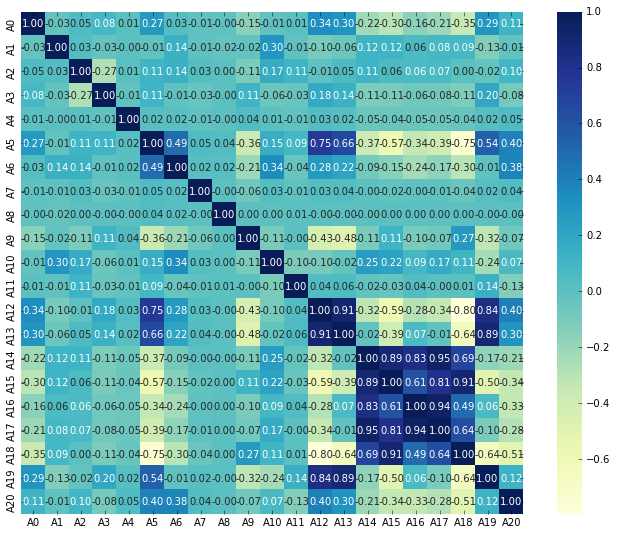

In [11]:
#相关西数分析，pixel版
corrmat= All_data.corr()
f,ax=plt.subplots(figsize=(12,9))
hm = sns.heatmap(corrmat,square=True,annot=True,fmt=".2f",cmap='YlGnBu');
hm.set_ylim([All_data.shape[1], 0]);

In [12]:
Y0 = All_data['A0']
Y1 = All_data['A1']
All_data_Fea  = All_data.drop(['A0','A1'],axis=1)

## category factor (A2,A3,A4)

In [95]:
All_dataPx1 = pd.read_csv('Raster10m.csv',encoding='utf-8',delimiter=',')

In [101]:
pd.crosstab(All_dataPx1.A2,All_dataPx1.A0).T.style.background_gradient(cmap='summer_r')

In [102]:
pd.crosstab(All_dataPx1.A2,All_dataPx1.A0).apply(lambda r: r/r.sum(), axis=1).T.style.background_gradient(cmap='summer_r')

In [97]:
pd.crosstab(All_dataPx1.A2,All_dataPx1.A1).T.style.background_gradient(cmap='summer_r')

In [103]:
pd.crosstab(All_dataPx1.A2,All_dataPx1.A1).apply(lambda r: r/r.sum(), axis=1).T.style.background_gradient(cmap='summer_r')

In [98]:
pd.crosstab(All_dataPx1.A3,All_dataPx1.A0).T.style.background_gradient(cmap='summer_r')

In [104]:
pd.crosstab(All_dataPx1.A3,All_dataPx1.A0).apply(lambda r: r/r.sum(), axis=1).T.style.background_gradient(cmap='summer_r')

In [116]:
pd.crosstab(All_dataPx1.A3,All_dataPx1.A1).T.style.background_gradient(cmap='summer_r')

In [105]:
pd.crosstab(All_dataPx1.A3,All_dataPx1.A1).apply(lambda r: r/r.sum(), axis=1).T.style.background_gradient(cmap='summer_r')

In [122]:
pd.crosstab(All_dataPx1.A3,[All_dataPx1.A1,All_dataPx1.A2]).T.style.background_gradient(cmap='summer_r')

In [125]:
pd.crosstab(All_dataPx1.A4,All_dataPx1.A0).T.style.background_gradient(cmap='summer_r')

In [126]:
pd.crosstab(All_dataPx1.A4,All_dataPx1.A1).T.style.background_gradient(cmap='summer_r')

## Continuous variable(A5~)

In [157]:
def plot_var_his(Data = All_dataPx1 ,col = 'A5',densitys=True):
    plt.figure(figsize=(10,10))
    
    plt.subplot(2,1,1)
    plt.hist(Data[Data['A0']==0][col],24,alpha =0.5,color ='m', label ='No-HLS',density=densitys);
    plt.hist(Data[Data['A0']==1][col],24,alpha =0.5,color ='c', label ='HLS',density=densitys);
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    
    
    plt.subplot(2,1,2)
    plt.hist(Data[Data['A1']==0][col],24,alpha =0.5, label ='No-ELS',density=densitys);
    plt.hist(Data[Data['A1']==1][col],24,alpha =0.5, label ='ELS',density=densitys);
    plt.legend(loc = 'upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    
    plt.show()

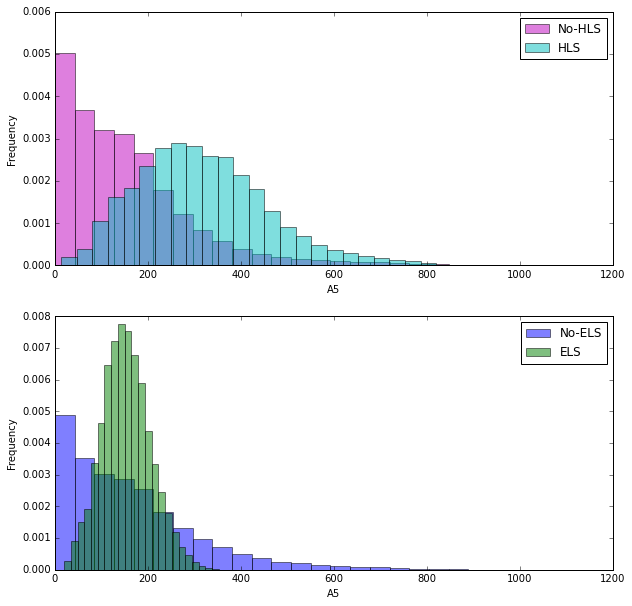

In [159]:
plot_var_his(Data = All_dataPx1 ,col = 'A5',densitys=True)

In [177]:
All_dataPx1['Fig']=1

In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)

sns.violinplot(y ='A5', x='Fig', hue='A0',data=All_dataPx1,split=True)
plt.xlabel('Histroical Landslides Group',fontsize=14)

plt.ylabel('Elevation(m)',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right',fontsize=14)

plt.subplot(1,2,2)

sns.violinplot(y ='A5', x='Fig', hue='A1',data=All_dataPx1,split=True,palette="Set2")
plt.xlabel('Earthquake-induced Landslides Group',fontsize=14)

plt.ylabel('Elevation(m)',fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 'upper right',fontsize=14)

([], [])

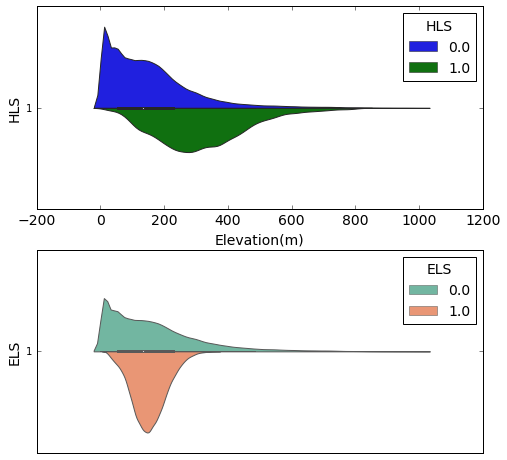

In [231]:
All_dataPo1['Fig']=1

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

sns.violinplot( x='A5', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Elevation(m)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(2,1,2)
sns.violinplot( x='A5', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)
plt.xticks([])

([], [])

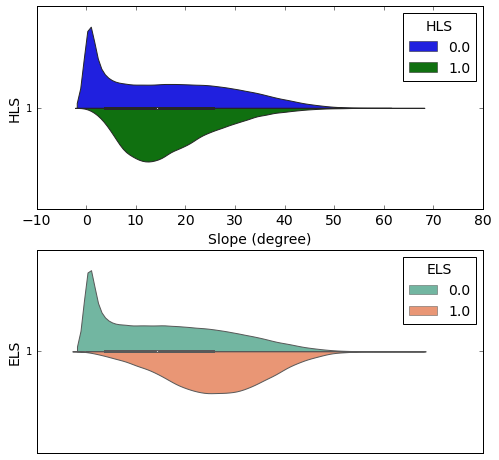

In [232]:
All_dataPo1['Fig']=1

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

sns.violinplot( x='A6', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Slope (degree)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(2,1,2)
sns.violinplot( x='A6', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)
plt.xticks([])

([], [])

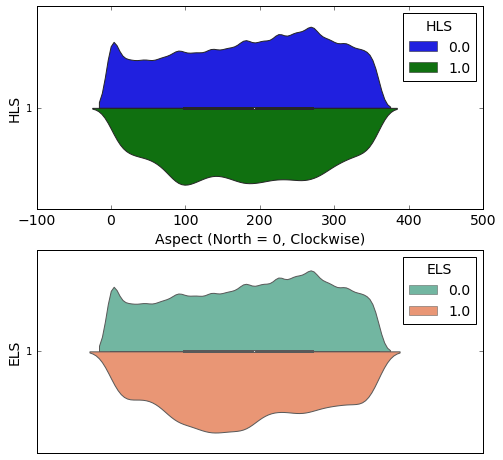

In [233]:
All_dataPo1['Fig']=1

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

sns.violinplot( x='A7', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Aspect (North = 0, Clockwise)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(2,1,2)
sns.violinplot( x='A7', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)
plt.xticks([])

([], [])

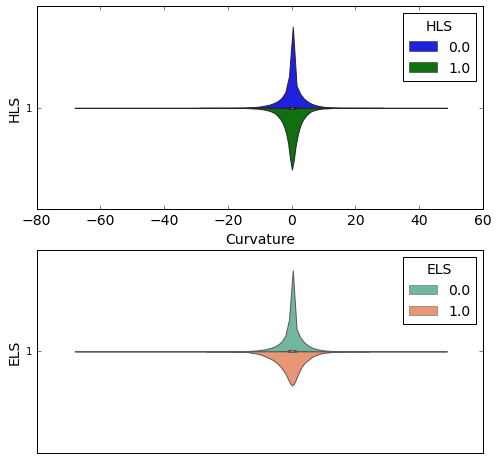

In [234]:
All_dataPo1['Fig']=1

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

sns.violinplot( x='A8', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Curvature',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(2,1,2)
sns.violinplot( x='A8', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)
plt.xticks([])

([], [])

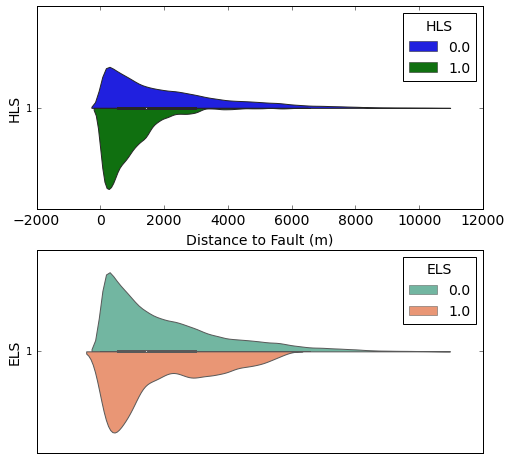

In [235]:
All_dataPo1['Fig']=1

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

sns.violinplot( x='A9', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Distance to Fault (m)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(2,1,2)
sns.violinplot( x='A9', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)
plt.xticks([])

([], [])

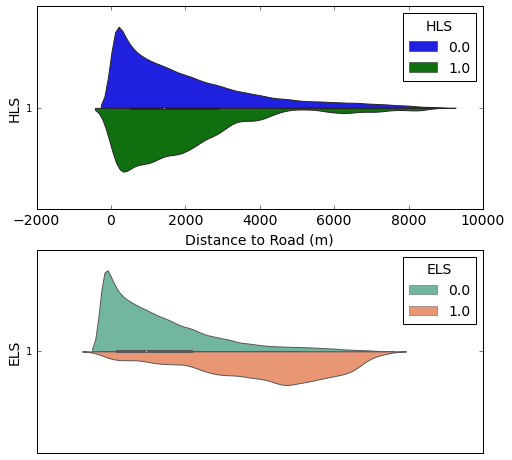

In [236]:
All_dataPo1['Fig']=1

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

sns.violinplot( x='A10', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Distance to Road (m)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(2,1,2)
sns.violinplot( x='A10', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('')
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)
plt.xticks([])

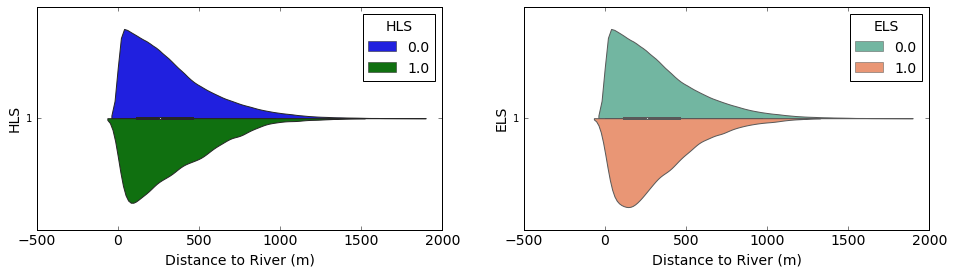

In [253]:
All_dataPo1['Fig']=1

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

sns.violinplot( x='A11', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Distance to River (m)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(1,2,2)
sns.violinplot( x='A11', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('Distance to River (m)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

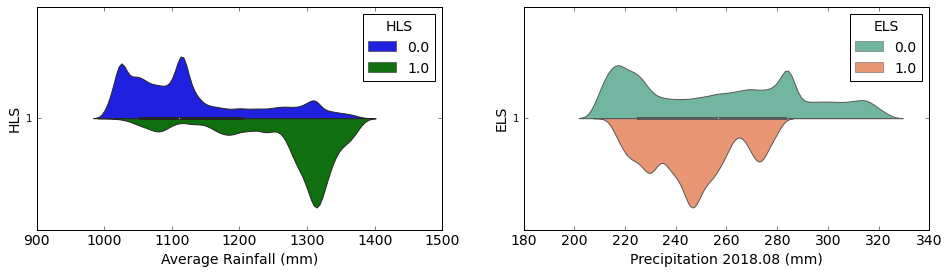

In [238]:
All_dataPo1['Fig']=1

plt.figure(figsize=(16,4))


plt.subplot(1,2,1)
sns.violinplot( x='A12', y='Fig', hue='A0',data=All_dataPo1,split=True,orient='h')
plt.xlabel('Average Rainfall (mm)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('HLS',fontsize=14)
plt.legend(loc = 'upper right',title='HLS',title_fontsize=14,fontsize=14)



plt.subplot(1,2,2)

sns.violinplot( x='A13', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('Precipitation 2018.08 (mm)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

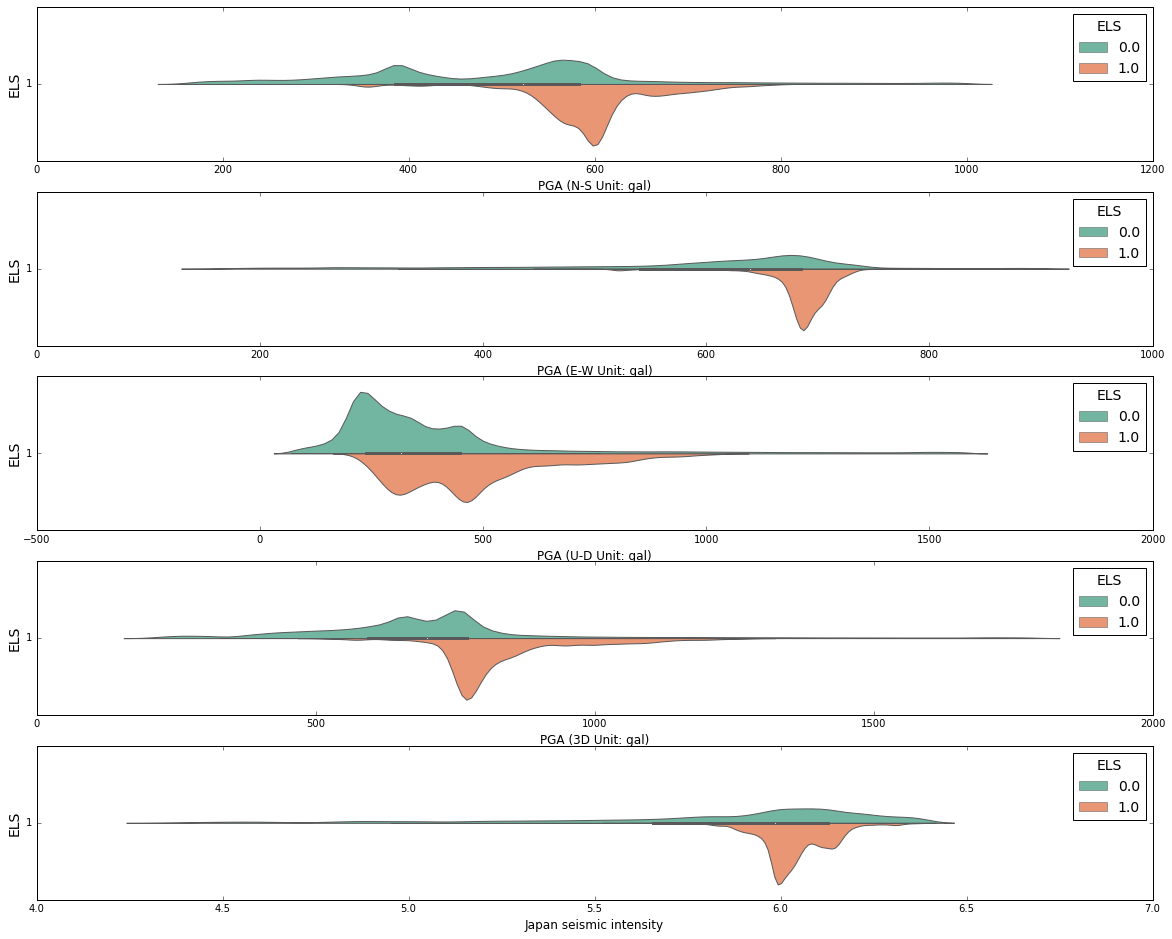

In [251]:
plt.figure(figsize=(20,16))

plt.subplot(5,1,1)
sns.violinplot(x='A14', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xticks(fontsize=10)
plt.xlabel('PGA (N-S Unit: gal)',fontsize=12)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)


plt.subplot(5,1,2)
sns.violinplot(x='A15', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xticks(fontsize=10)
plt.xlabel('PGA (E-W Unit: gal)',fontsize=12)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

plt.subplot(5,1,3)
sns.violinplot(x='A16', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xticks(fontsize=10)
plt.xlabel('PGA (U-D Unit: gal)',fontsize=12)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

plt.subplot(5,1,4)
sns.violinplot(x='A17', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xticks(fontsize=10)
plt.xlabel('PGA (3D Unit: gal)',fontsize=12)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

plt.subplot(5,1,5)
sns.violinplot(x='A18', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xticks(fontsize=10)
plt.xlabel('Japan seismic intensity',fontsize=12)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

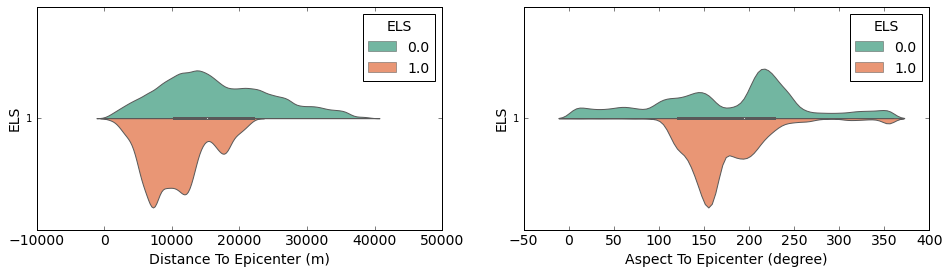

In [252]:
plt.figure(figsize=(16,4))


plt.subplot(1,2,1)
sns.violinplot( x='A19', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('Distance To Epicenter (m)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)



plt.subplot(1,2,2)

sns.violinplot( x='A20', y='Fig', hue='A1',data=All_dataPo1,split=True,orient='h',palette="Set2")
plt.xlabel('Aspect To Epicenter (degree)',fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('ELS',fontsize=14)
plt.legend(loc = 'upper right',title='ELS',title_fontsize=14,fontsize=14)

import statsmodels.formula.api as smf

def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = smf.ols(formula, df).fit().rsquared
    return 1./(1.-r2)

for i in All_data_Fea.columns:
    print(i, '\t', vif(All_data_Fea,col_i=i))

# Model training speed test

## Model loading area

In [392]:
#本处为载入将要运用的全部模型
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import LinearSVC

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import accuracy_score,mean_squared_error,roc_auc_score,roc_curve

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [14]:
# 随机种子42     5折训练
SEED = 42 
NFOLDS = 5
KF = KFold(n_splits= NFOLDS,random_state=SEED)

In [15]:
# 用来减少内存使用的方程
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum()  / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))  
    for col in df.columns:
        col_type = df[col].dtype    
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum()  / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [16]:
All_data = reduce_mem_usage(All_data)

Memory usage of dataframe is 879.98 MB
Memory usage after optimization is: 549.99 MB
Decreased by 37.5%


In [18]:
y_hls =  All_data['A0']
y_hlsp1 = All_dataPo1['A0']
y_hlsp2 = All_dataPo2['A0']
y_hlsp3 = All_dataPo3['A0']
x_hls =  All_data[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]
x_hlsp1 = All_dataPo1[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]
x_hlsp2 = All_dataPo2[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]
x_hlsp3 = All_dataPo3[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]

## Minimum and maximum process (0.1-0.9)

In [19]:
# 对输入模型进行标准化转化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
print("-----------------------before the preprocessing--------------------------------")
Max_Sca = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_max_
print('The maximun of each columns',Max_Sca)
Min_Sca = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_min_
print('The minimun of each columns',Min_Sca)


print("-----------------------After the preprocessing--------------------------------")
column_index = x_hls.columns
x_hls_values = MinMaxScaler(feature_range=(0.1,0.9)).fit_transform(x_hls.values)
x_hls =pd.DataFrame(x_hls_values, columns = column_index) 


Max_Sca_after = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_max_
print('The maximun of each columns',Max_Sca_after)
Min_Sca_after = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_min_
print('The minimun of each columns',Min_Sca_after)

-----------------------before the preprocessing--------------------------------
The maximun of each columns [   20.      18.      12.    1016.      72.4    360.      59.75 10750.
  9000.    1886.    1383.  ]
The minimun of each columns [  1.     1.     1.     0.     0.    -1.   -67.56   0.     0.     0.
 997.5 ]
-----------------------After the preprocessing--------------------------------
The maximun of each columns [0.9    0.9    0.8994 0.9    0.8994 0.9    0.9    0.9    0.9    0.9
 0.8984]
The minimun of each columns [0.1     0.1     0.1     0.1     0.1     0.1     0.09985 0.1     0.1
 0.1     0.0996 ]


In [20]:
columns = ['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']
for i, column_name in enumerate(columns):
    x_hlsp1[column_name] = x_hlsp1[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))
    x_hlsp2[column_name] = x_hlsp2[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))
    x_hlsp3[column_name] = x_hlsp3[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))

## Positive and negative sample ratio chart

Text(0.5, 1.0, 'Dataset: Po3')

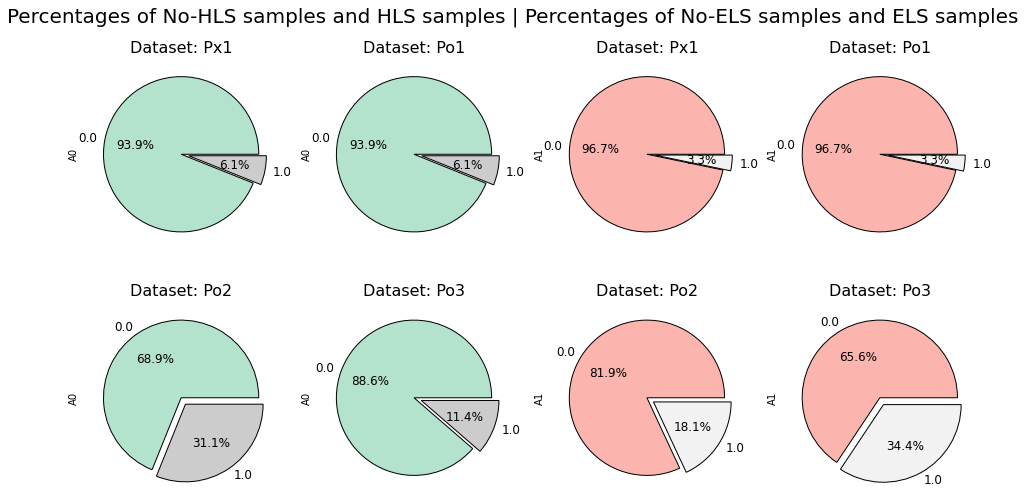

In [115]:
plt.figure(figsize=(16,8))
plt.suptitle('Percentages of No-HLS samples and HLS samples | Percentages of No-ELS samples and ELS samples ',fontsize=20)

plt.subplot(2,4,1)
y_hls.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel2',fontsize=12)
plt.title('Dataset: Px1',fontsize=16)

plt.subplot(2,4,2)
y_hlsp1.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel2',fontsize=12)
plt.title('Dataset: Po1',fontsize=16)

plt.subplot(2,4,5)
y_hlsp2.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel2',fontsize=12)
plt.title('Dataset: Po2',fontsize=16)

plt.subplot(2,4,6)
y_hlsp3.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel2',fontsize=12)    
plt.title('Dataset: Po3',fontsize=16)

plt.subplot(2,4,3)
y_els.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel1',fontsize=12)
plt.title('Dataset: Px1',fontsize=16)

plt.subplot(2,4,4)
y_elsp1.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel1',fontsize=12)
plt.title('Dataset: Po1',fontsize=16)

plt.subplot(2,4,7)
y_elsp2.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel1',fontsize=12)
plt.title('Dataset: Po2',fontsize=16)

plt.subplot(2,4,8)
y_elsp3.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',colormap='Pastel1',fontsize=12)    
plt.title('Dataset: Po3',fontsize=16)

In [36]:
All_dataPo1

XCoord     YCoord     FID   A0   A1    A2   A3   A4          A5  \
0       142.276684  42.975213       0  1.0  0.0   8.0  2.0  3.0  780.200012   
1       142.270616  42.983365       1  0.0  0.0   2.0  9.0  3.0  624.599976   
2       142.279184  42.976626       2  1.0  0.0   8.0  2.0  3.0  798.900024   
3       142.258678  42.975061       3  0.0  0.0   2.0  9.0  3.0  643.799988   
4       142.274213  42.975556       4  0.0  0.0   2.0  9.0  3.0  722.000000   
...            ...        ...     ...  ...  ...   ...  ...  ...         ...   
499995  141.971307  42.530893  499995  0.0  0.0  17.0  5.0  2.0   20.200001   
499996  141.968159  42.529802  499996  0.0  0.0   1.0  5.0  4.0    2.000000   
499997  141.969205  42.530871  499997  0.0  0.0   1.0  5.0  4.0    6.000000   
499998  141.969674  42.531032  499998  0.0  0.0  12.0  5.0  4.0    7.400000   
499999  141.967649  42.530665  499999  0.0  0.0   1.0  5.0  4.0    1.699999   

               A6  ...         A11          A12         A13         A14  \
0       19.577089  ...  425.768860  1367.176270  323.425049  158.991211   
1       27.177683  ...  126.036835  1376.459717  324.397583  161.100571   
2        9.267973  ...  672.939392  1367.023804  323.535797  156.376450   
3       28.683403  ...  527.803467  1375.043457  323.562408  173.853897   
4       36.453197  ...  275.540039  1368.534790  323.496979  160.971649   
...           ...  ...         ...          ...         ...         ...   
499995   1.035041  ...  471.214996  1005.775391  226.821472  342.951996   
499996   1.611947  ...  620.188782  1007.006531  226.938263  344.620728   
499997   1.675988  ...  599.503601  1006.566345  226.688766  344.869568   
499998   2.638898  ...  577.269897  1006.412231  226.684631  344.621857   
499999   2.250008  ...  700.827332  1007.177246  226.679474  345.955963   

               A15         A16         A17       A18          A19    A20  
0       158.873245  110.062302  230.806763  4.341104  38622.59766  213.0  
1       161.992722  114.798889  237.278397  4.353373  39084.75391  212.0  
2       155.107483  107.217438  225.750366  4.326071  38865.33203  213.0  
3       180.255630  128.617096  261.979187  4.425839  37783.33984  211.0  
4       161.726288  112.580544  234.997299  4.352407  38536.47266  213.0  
...            ...         ...         ...       ...          ...    ...  
499995  539.919617  302.351624  544.140686  5.986466  17925.32422    9.0  
499996  543.831848  303.299500  547.773315  5.998487  18091.88477    9.0  
499997  544.287720  303.154022  548.250732  5.999435  17961.22070    9.0  
499998  543.710632  303.025177  547.712341  5.997678  17934.99805    9.0  
499999  546.802734  303.682953  550.603333  6.007033  18002.53320   10.0  

[497876 rows x 24 columns]

## Basic speed test in LR model

In [22]:
def get_oof1(clf, X_Train, y_Train):
    oof_train = np.zeros((len(X_Train),))
#    oof_test = np.zeros((n_test,))
#    oof_test_skf = np.empty((NFOLDS, n_test))
    X_Train.index = range(len(X_Train))
    y_Train.index = range(len(y_Train))
    for i, (train_index, test_index) in enumerate(KF.split(X_Train)):
        X_tr = X_Train.loc[train_index]
        y_tr = y_Train.loc[train_index]
        X_te = X_Train.loc[test_index]

        clf.fit(X_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(X_te)[:,1]
#        oof_test_skf[i, :] = clf.predict_proba(X_Test)[:,1]

    #oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1)#, oof_test.reshape(-1, 1)


def get_oof(clf, X_Train, y_Train, X_Test):
    oof_train = np.zeros((len(X_Train),))
    oof_test = np.zeros((len(X_Test),))
    oof_test_skf = np.empty((NFOLDS, len(X_Test)))
    X_Train.index = range(len(X_Train))
    y_Train.index = range(len(y_Train))
    for i, (train_index, test_index) in enumerate(KF.split(X_Train)):
        X_tr = X_Train.loc[train_index]
        y_tr = y_Train.loc[train_index]
        X_te = X_Train.loc[test_index]

        clf.fit(X_tr, y_tr)

        oof_train[test_index] = clf.predict_proba(X_te)[:,1]
        oof_test_skf[i, :] = clf.predict_proba(X_Test)[:,1]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [23]:
%time lr_oof_train = get_oof1(LogisticRegression(), x_hls, y_hls)
print("lr single AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_train))

%time lr_oof_trainp1 = get_oof1(LogisticRegression(), x_hlsp1, y_hlsp1)
print("lr single AUC score: %.4f" % roc_auc_score(y_hlsp1,lr_oof_trainp1))

%time lr_oof_trainp2 = get_oof1(LogisticRegression(), x_hlsp2, y_hlsp2)
print("lr single AUC score: %.4f" % roc_auc_score(y_hlsp2,lr_oof_trainp2))

%time lr_oof_trainp3 = get_oof1(LogisticRegression(), x_hlsp3, y_hlsp3)
print("lr single AUC score: %.4f" % roc_auc_score(y_hlsp3,lr_oof_trainp3))

Wall time: 3min 46s
lr single AUC score: 0.8479
Wall time: 9.63 s
lr single AUC score: 0.8493
Wall time: 1.86 s
lr single AUC score: 0.8615
Wall time: 258 ms
lr single AUC score: 0.8133


In [24]:
%time lr_oof_trainp1, lr_oof_testp1  = get_oof(LogisticRegression(), x_hlsp1, y_hlsp1, x_hls)
%time lr_oof_trainp2, lr_oof_testp2  = get_oof(LogisticRegression(), x_hlsp2, y_hlsp2, x_hls)
%time lr_oof_trainp3, lr_oof_testp3  = get_oof(LogisticRegression(), x_hlsp3, y_hlsp3, x_hls)
print("lr single AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_testp1))
print("lr single AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_testp2))
print("lr single AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_testp3))

Wall time: 13.7 s
Wall time: 5.98 s
Wall time: 4.35 s
lr single AUC score: 0.8722
lr single AUC score: 0.8721
lr single AUC score: 0.8636


In [25]:
%time lr_oof_train, lr_oof_test  = get_oof(LogisticRegression(), x_hls, y_hls, x_hls)
print("lr single AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_test))

Wall time: 3min 53s
lr single AUC score: 0.8720


## Test Results
The datasets' sample composition is shown in Fig 17, which means that if divided by area, the ratio of the total area of the HLS and ELS is about 6.1% and 3.3% of the total area, respectively. In Table 3, we removed samples that have missing values that come from rivers or reservoirs. It can be seen that compared to a large number of samples, removed samples only occupy a small part. Simultaneously, we used four datasets to train the untuned LR model to record the train time and then test it with the Pi1 dataset, which contains complete information in the present research. The result is that training time reduces as the sample size shrinks. Dataset Po2's performance on the test dataset Pi1 is even better than dataset Pi1 itself. Since the LR model is the simplest model among the following models we studied, if we use the dataset Pi1 to train more complex models such as RF and MLP, the time consumption will reach the hour level, adding the necessary parameters adjustment, the final calculation amount may be unbearable. In summary, we use the dataset Po2 as the training set and dataset Po1 as the testing set.

![Basic LR training time and AUC value](35.png)

# HLS model training

## Data processing

In [653]:
y_hls =  All_data['A0']
y_hlsp1 = All_dataPo1['A0']
y_hlsp2 = All_dataPo2['A0']
y_hlsp3 = All_dataPo3['A0']
x_hls =  All_data[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]
x_hlsp1 = All_dataPo1[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]
x_hlsp2 = All_dataPo2[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]
x_hlsp3 = All_dataPo3[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']]

In [654]:
print("-----------------------before the preprocessing--------------------------------")
Max_Sca = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_max_
print('The maximun of each columns',Max_Sca)
Min_Sca = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_min_
print('The minimun of each columns',Min_Sca)


print("-----------------------After the preprocessing--------------------------------")
column_index = x_hls.columns
x_hls_values = MinMaxScaler(feature_range=(0.1,0.9)).fit_transform(x_hls.values)
x_hls =pd.DataFrame(x_hls_values, columns = column_index) 


Max_Sca_after = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_max_
print('The maximun of each columns',Max_Sca_after)
Min_Sca_after = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_hls).data_min_
print('The minimun of each columns',Min_Sca_after)

-----------------------before the preprocessing--------------------------------
The maximun of each columns [   20.      18.      12.    1016.      72.4    360.      59.75 10750.
  9000.    1886.    1383.  ]
The minimun of each columns [  1.     1.     1.     0.     0.    -1.   -67.56   0.     0.     0.
 997.5 ]
-----------------------After the preprocessing--------------------------------
The maximun of each columns [0.9    0.9    0.8994 0.9    0.8994 0.9    0.9    0.9    0.9    0.9
 0.8984]
The minimun of each columns [0.1     0.1     0.1     0.1     0.1     0.1     0.09985 0.1     0.1
 0.1     0.0996 ]


In [655]:
columns = ['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']
for i, column_name in enumerate(columns):
    x_hlsp1[column_name] = x_hlsp1[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))
    x_hlsp2[column_name] = x_hlsp2[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))
    x_hlsp3[column_name] = x_hlsp3[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))

## LR

In [647]:
initial_params ={'penalty':'l2',
                 'random_state':SEED,
                 'verbose':0,
                 'n_jobs':8}

params_test1 = {'solver': ['newton-cg','sag','lbfgs'],
                'C':[1e-5,1e-4,1e-3,1e-2,1e-1,0,0.1,10,100,1000,10000]}
params_test2 = {'tol':[1e-1,3e-1,1e-2,3e-2,1e-3,3e-3,1e-4,3e-4,1e-5,3e-5],
                'max_iter':[100,300,1000,3000,10000]}
                       
               
params_turns = 2

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = LogisticRegression(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_hlsp2,y_hlsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(LogisticRegression(**initial_params), x_hlsp2, y_hlsp2, x_hlsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_hlsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'solver': ['newton-cg', 'sag', 'lbfgs'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 0.1, 10, 100, 1000, 10000]}
Start Fiting, params_test1
Wall time: 20.9 s
{'C': 0.001, 'solver': 'newton-cg'} Best evaluation Scores 0.9052758006463895
This parameter in Testing Dataset AUC score: 0.8738
----------------------Finding Parameters, params_test2 --------------------------
Parameters: params_test2 {'tol': [0.1, 0.3, 0.01, 0.03, 0.001, 0.003, 0.0001, 0.0003, 1e-05, 3e-05], 'max_iter': [100, 300, 1000, 3000, 10000]}
Start Fiting, params_test2
Wall time: 21.8 s
{'max_iter': 100, 'tol': 0.01} Best evaluation Scores 0.9052758561912585
This parameter in Testing Dataset AUC score: 0.8553


In [271]:
final_result=[]
final_para=[]
final_result.append(df_cv_result)
final_para.append(initial_params)

## DT

In [272]:
initial_params ={'criterion':'gini',
                 'splitter':'best',
                 'random_state':SEED}


params_test1 = {'max_depth': [3,4,5,6,7,8,9,10,20,'None'],
                'min_samples_split':[2,3,4,5,6,7,8,9,10,20,30],
                'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

params_turns = 1

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)

    gsearch = GridSearchCV(estimator = DecisionTreeClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)

    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_hlsp2,y_hlsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(DecisionTreeClassifier(**initial_params), x_hlsp2, y_hlsp2, x_hlsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_hlsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)

    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 'None'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
Start Fiting, params_test1
Wall time: 3min 14s
{'max_depth': 5, 'max_features': 0.6, 'min_samples_split': 2} Best evaluation Scores 0.8646493527226526
This parameter in Testing Dataset AUC score: 0.9660


In [273]:
final_result.append(df_cv_result)
final_para.append(initial_params)

## KNN

In [274]:
initial_params ={'weights':'uniform',
                 'algorithm':'auto'}


params_test1 = {'n_neighbors': [5,10,15,20,25,30,100],
                'metric':['minkowski','euclidean','manhattan']} 

params_turns = 1

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)

    gsearch = GridSearchCV(estimator = KNeighborsClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=5)

    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_hlsp2,y_hlsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(KNeighborsClassifier(**initial_params), x_hlsp2, y_hlsp2, x_hlsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_hlsp1,lr_oof_testp2))
    

    initial_params.update(gsearch.best_params_)

    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'n_neighbors': [5, 10, 15, 20, 25, 30, 100], 'metric': ['minkowski', 'euclidean', 'manhattan']}
Start Fiting, params_test1
Wall time: 5min 35s
{'metric': 'minkowski', 'n_neighbors': 100} Best evaluation Scores 0.8326064482647426
This parameter in Testing Dataset AUC score: 0.9586


In [275]:
final_result.append(df_cv_result)
final_para.append(initial_params)

## ANN MLP

In [277]:
initial_params ={'solver':'adam',
                 'learning_rate':'adaptive',
                 'max_iter':2000,
                 'batch_size':200,
                 'early_stopping':True}


params_test1 = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'hidden_layer_sizes':[(16,),(32,),(64,),(128,),(256,),(512,)]}

params_turns = 1

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)

    gsearch = GridSearchCV(estimator = MLPClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)

    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_hlsp2,y_hlsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(MLPClassifier(**initial_params), x_hlsp2, y_hlsp2, x_hlsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_hlsp1,lr_oof_testp2))
    
    
    initial_params.update(gsearch.best_params_)

    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(16,), (32,), (64,), (128,), (256,), (512,)]}
Start Fiting, params_test1
Wall time: 10min 16s
{'activation': 'relu', 'hidden_layer_sizes': (16,)} Best evaluation Scores 0.94131354695512
This parameter in Testing Dataset AUC score: 0.9229


In [278]:
final_result.append(df_cv_result)
final_para.append(initial_params)

In [279]:
initial_params ={'solver':'adam',
                 'learning_rate':'adaptive',
                 'activation':'tanh',
                 'max_iter':2000,
                 'batch_size':200,
                 'early_stopping':True}

params_test1 = {'hidden_layer_sizes':[(16,8),(32,16),(64,32),(128,64),(256,128),(512,256),
                                      (16,8,4),(32,16,8),(64,32,16),(128,64,32),(256,128,64),(512,256,128),
                                      (32,16,8,4),(64,32,16,8),(128,64,32,16),(256,128,64,32),(512,256,128,64),
                                      (64,32,16,8,4),(128,64,32,16,8),(256,128,64,32,16),(512,256,128,64,32)]}

params_turns = 1

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)

    gsearch = GridSearchCV(estimator = MLPClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)

    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_hlsp2,y_hlsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(MLPClassifier(**initial_params), x_hlsp2, y_hlsp2, x_hls)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_testp2))
    
    
    initial_params.update(gsearch.best_params_)

    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'hidden_layer_sizes': [(16, 8), (32, 16), (64, 32), (128, 64), (256, 128), (512, 256), (16, 8, 4), (32, 16, 8), (64, 32, 16), (128, 64, 32), (256, 128, 64), (512, 256, 128), (32, 16, 8, 4), (64, 32, 16, 8), (128, 64, 32, 16), (256, 128, 64, 32), (512, 256, 128, 64), (64, 32, 16, 8, 4), (128, 64, 32, 16, 8), (256, 128, 64, 32, 16), (512, 256, 128, 64, 32)]}
Start Fiting, params_test1
Wall time: 1h 28min 53s
{'hidden_layer_sizes': (16, 8, 4)} Best evaluation Scores 0.852138729511773
This parameter in Testing Dataset AUC score: 0.8859


In [280]:
final_result.append(df_cv_result)
final_para.append(initial_params)

## RF

In [281]:
initial_params ={'criterion':'gini',
                 'random_state':SEED}


params_test1 = {'max_depth': [3,4,5,6,7,8,9,10,20,'None'],
                'min_samples_split':[2,3,4,5,6,7,8,9,10,20,30]}
params_test2 = {'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
params_test3 = {'n_estimators':[100,200,300,400,500,700,1000]}


params_turns = 3

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)

    gsearch = GridSearchCV(estimator = RandomForestClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)

    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_hlsp2,y_hlsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(RandomForestClassifier(**initial_params), x_hlsp2, y_hlsp2, x_hls)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_hls,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)

    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 'None'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}
Start Fiting, params_test1
Wall time: 14min 30s
{'max_depth': 5, 'min_samples_split': 30} Best evaluation Scores 0.8915396838626997
This parameter in Testing Dataset AUC score: 0.9813
----------------------Finding Parameters, params_test2 --------------------------
Parameters: params_test2 {'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
Start Fiting, params_test2
Wall time: 1min 40s
{'max_features': 0.1} Best evaluation Scores 0.8955127706390341
This parameter in Testing Dataset AUC score: 0.9054
----------------------Finding Parameters, params_test3 --------------------------
Parameters: params_test3 {'n_estimators': [100, 200, 300, 400, 500, 700, 1000]}
Start Fiting, params_test3
Wall time: 2min 7s
{'n_estimators': 100} Best evaluation Scores 0.89551

In [282]:
final_result.append(df_cv_result)
final_para.append(initial_params)

## Bagging

In [656]:
LR_Para1 = {'penalty': 'l2',
            'random_state': 42,
            'verbose': 0,
            'n_jobs': 8,
            'C': 0.001,
            'solver': 'newton-cg',
            'max_iter': 100,
            'tol': 0.01}
DT_Para1 = {'criterion': 'gini', 
            'splitter': 'best', 
            'random_state': 42, 
            'max_depth': 5, 
            'max_features': 0.6, 
            'min_samples_split': 2}
KNN_Para1 = {'weights': 'uniform', 
             'algorithm': 'auto', 
             'metric': 'minkowski', 
             'n_neighbors': 100}
ANN_Para1 =  {'solver': 'adam', 
              'learning_rate': 'adaptive', 
              'max_iter': 2000, 
              'batch_size': 200, 
              'early_stopping': True, 
              'activation': 'relu', 
              'hidden_layer_sizes': (16,)}
MLP_Para1 = {'solver': 'adam',
             'learning_rate': 'adaptive',
             'activation': 'tanh',
             'max_iter': 2000,
             'batch_size': 200,
             'early_stopping': True,
             'hidden_layer_sizes': (16, 8, 4)}
RF_Para1 =  {'criterion': 'gini',
             'random_state': 42,
             'max_depth': 5,
             'min_samples_split': 30,
             'max_features': 0.6,
             'n_estimators': 100}


def get_models():
    LR_HLS_1 = LogisticRegression(**LR_Para1)
    DT_HLS_1 =DecisionTreeClassifier(**DT_Para1)
    KNN_HLS_1= KNeighborsClassifier(**KNN_Para1)
    ANN_HLS_1 = MLPClassifier(**ANN_Para1)
    MLP_HLS_1 = MLPClassifier(**MLP_Para1)
    RF_HLS_1 = RandomForestClassifier(**RF_Para1)
    
    models ={'LR_HLS': LR_HLS_1,
             'DT_HLS': DT_HLS_1,
             'KNN_HLS':KNN_HLS_1,
             'ANN_HLS':ANN_HLS_1,
             'MLP_HLS':MLP_HLS_1,
             'RF_HLS':RF_HLS_1,
            }
    
    return models

In [657]:
aucresult1 = []
models = get_models()
X_Train = x_hlsp2
X_Test = x_hlsp1

y_Train =pd.DataFrame(y_hlsp2) 
y_Test = pd.DataFrame(y_hlsp1) 


Stacking_Train = pd.DataFrame(columns = models,index =X_Train.index)
Stacking_Test = pd.DataFrame(columns = models,index =X_Test.index)


for m in models:
    M1_oof_train, M1_oof_test = get_oof(models[m], X_Train, y_Train, X_Test)
    print(m,"Model K-Fold AUC Train score: %.4f  " % roc_auc_score(y_Train,pd.DataFrame(M1_oof_train,index=y_Train.index)),end='')
    print(m,"Model K-Fold AUC Test score: %.4f" % roc_auc_score(y_Test['A0'],pd.DataFrame(M1_oof_test,index=y_Test.index)))
    aucresult1.append(roc_auc_score(y_Test['A0'],pd.DataFrame(M1_oof_test,index=y_Test.index)))
    Stacking_Train[m] =  M1_oof_train.ravel()
    Stacking_Test[m] = M1_oof_test.ravel()

LR_HLS Model K-Fold AUC Train score: 0.8397  LR_HLS Model K-Fold AUC Test score: 0.8553
DT_HLS Model K-Fold AUC Train score: 0.8501  DT_HLS Model K-Fold AUC Test score: 0.9043
KNN_HLS Model K-Fold AUC Train score: 0.8758  KNN_HLS Model K-Fold AUC Test score: 0.9327
ANN_HLS Model K-Fold AUC Train score: 0.8795  ANN_HLS Model K-Fold AUC Test score: 0.8995
MLP_HLS Model K-Fold AUC Train score: 0.8851  MLP_HLS Model K-Fold AUC Test score: 0.9135
RF_HLS Model K-Fold AUC Train score: 0.8756  RF_HLS Model K-Fold AUC Test score: 0.9100


## Result od bagging and Stacking

In [658]:
Stacking = LogisticRegression().fit(Stacking_Train,y_Train)
print('Bagging training AUC score: %.4f' % roc_auc_score(y_Train,Stacking_Train.mean(axis=1)),end='')
print("  test AUC score: %.4f" % roc_auc_score(y_Test['A0'],Stacking_Test.mean(axis=1)))
print("LR stacking training AUC score: %.4f" % roc_auc_score(y_Train,Stacking.predict_proba(Stacking_Train)[:,1]),end='')
print("  test AUC score: %.4f" % roc_auc_score(y_Test['A0'],Stacking.predict_proba(Stacking_Test)[:,1]))

Bagging training AUC score: 0.8863  test AUC score: 0.9164
LR stacking training AUC score: 0.8887  test AUC score: 0.9203


In [660]:
ModelResult = Stacking_Train.copy()
ModelResult['Bagging'] = Stacking_Train.mean(axis=1)
ModelResult['Stacking'] =Stacking.predict_proba(Stacking_Train)[:,1]

ModelResult2 = Stacking_Test.copy()
ModelResult2['Bagging'] = Stacking_Test.mean(axis=1)
ModelResult2['Stacking'] =Stacking.predict_proba(Stacking_Test)[:,1]

In [661]:
ModelResult2['X'] = All_dataPo1['XCoord']
ModelResult2['Y'] = All_dataPo1['YCoord']
ModelResult2['HLS'] = All_dataPo1['A0']
ModelResult2['ELS'] = All_dataPo1['A1']

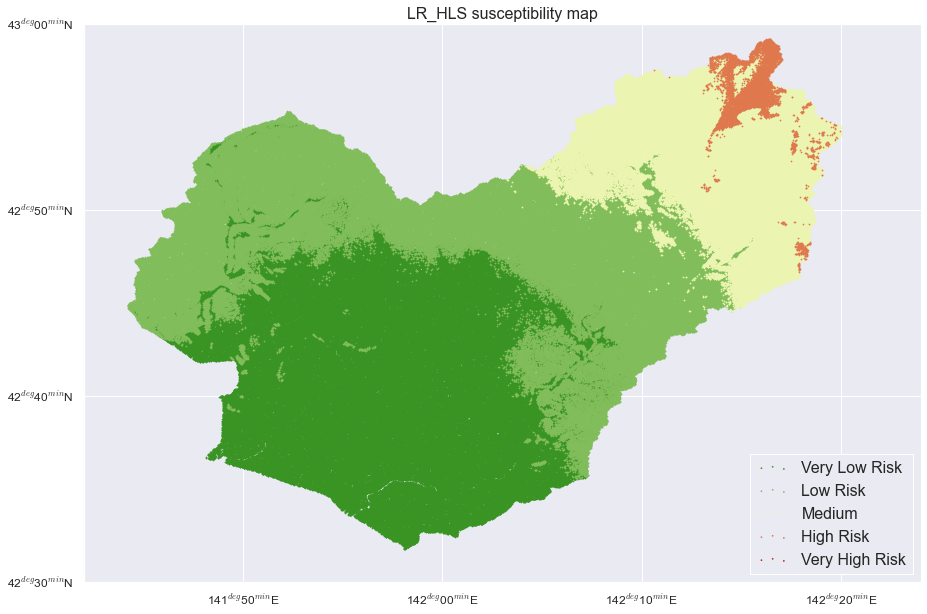

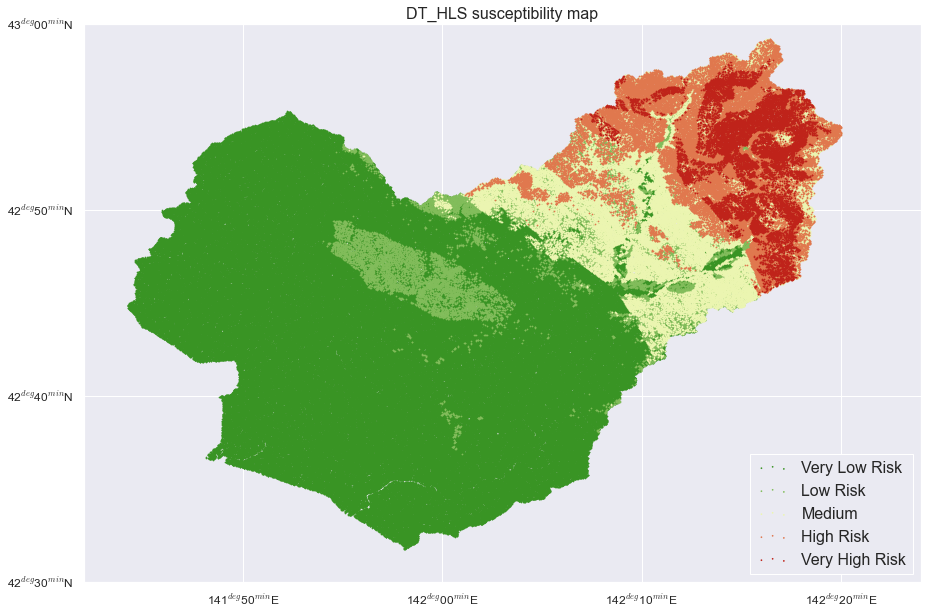

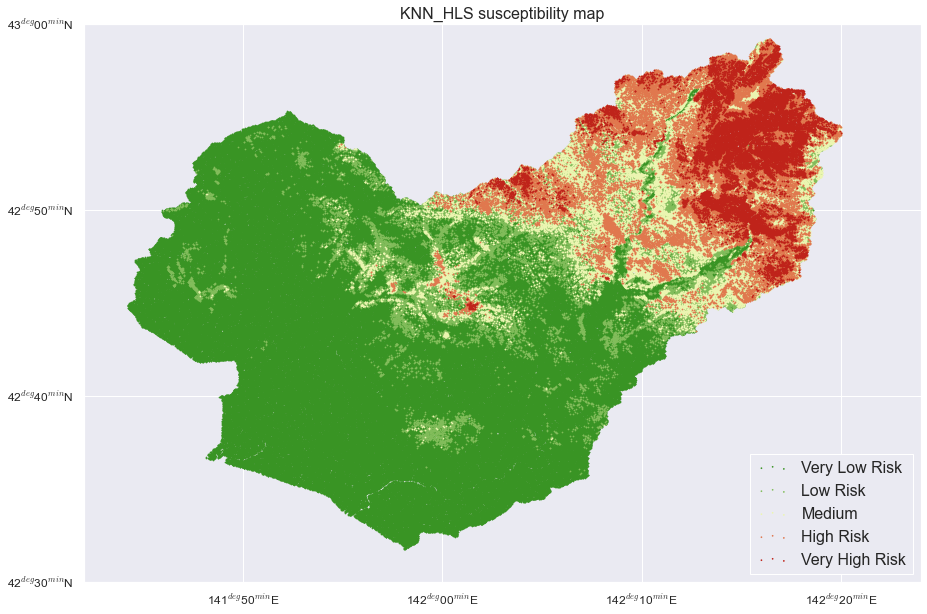

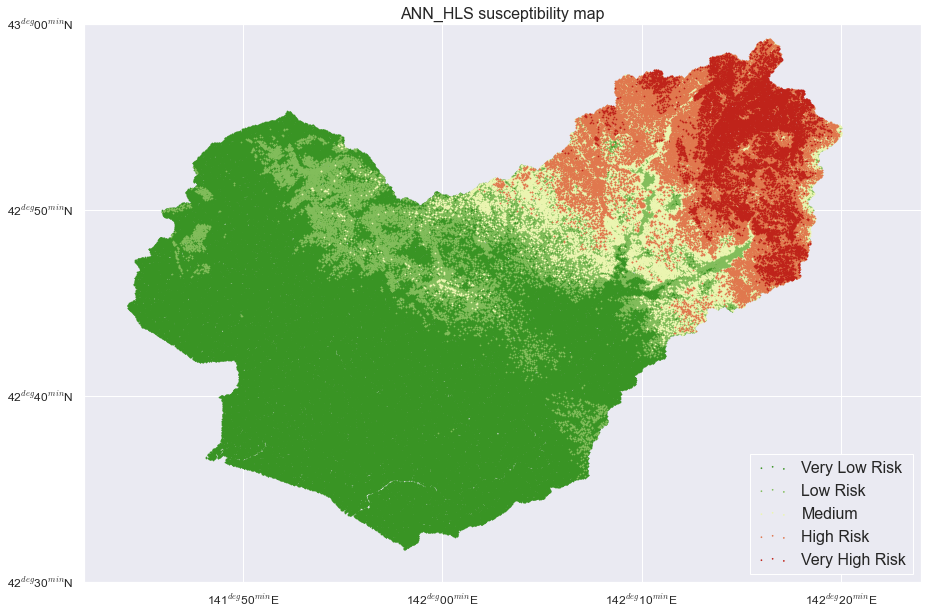

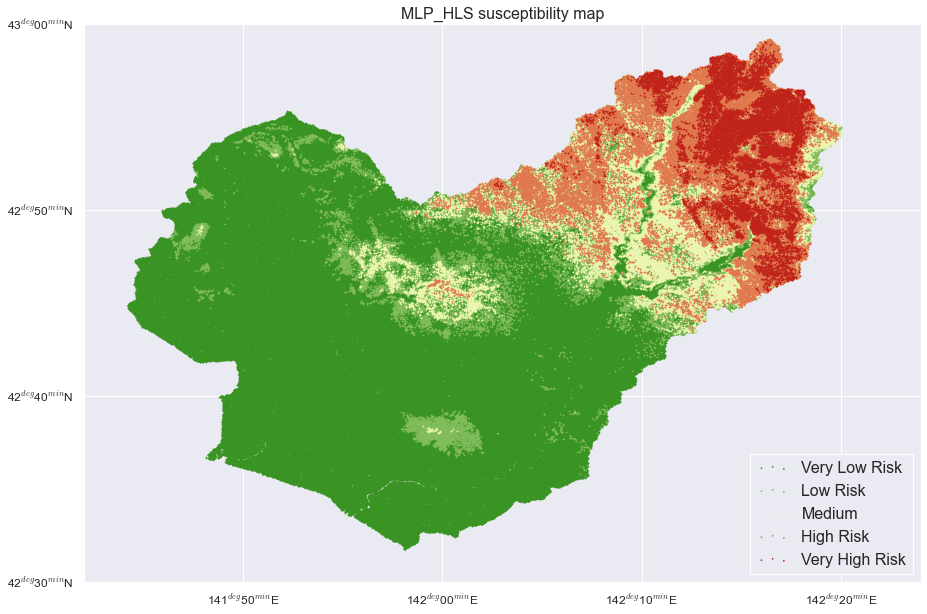

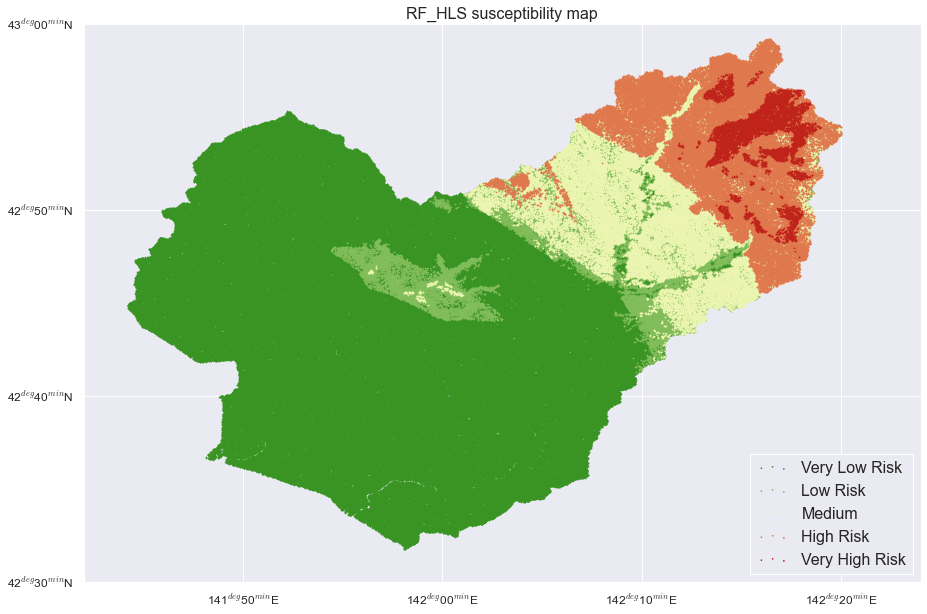

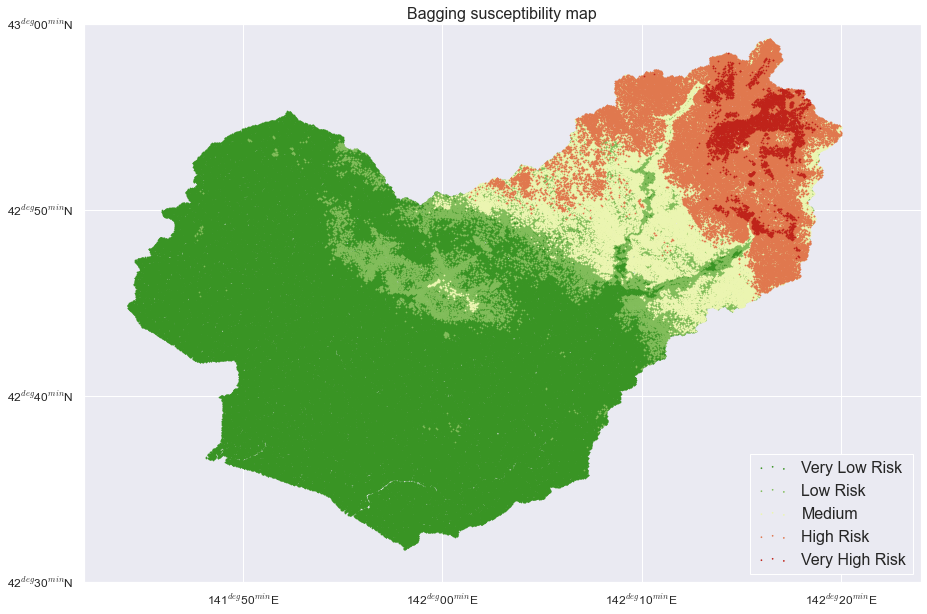

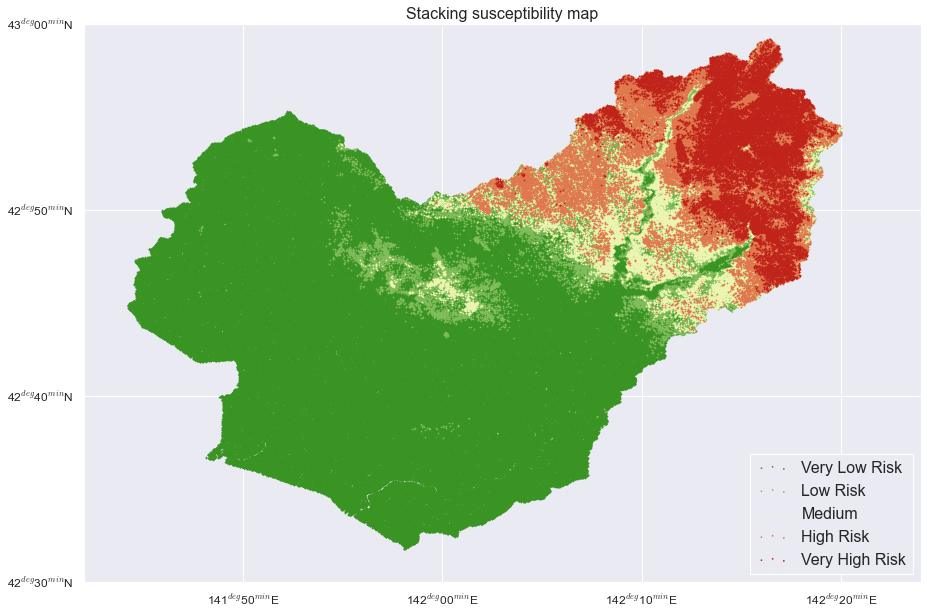

In [662]:
Labelvalues = ['Very Low Risk','Low Risk','Medium','High Risk','Very High Risk']
ColorLabel = ['#399424','#82BD5B','#ECF6B1','#E0784E','#BF231A']
bins = [-0.1,0.2,0.4,0.6,0.8,1.0]
TargetModel1 = ['LR_HLS','DT_HLS','KNN_HLS','ANN_HLS','MLP_HLS','RF_HLS','Bagging','Stacking']

for i in TargetModel1:
    ModelResult2['HLS_Risk'] = pd.cut(ModelResult2[i],bins,labels=['Very Low Risk','Low Risk',
                                                                      'Medium','High Risk','Very High Risk']) 

    plot_map_point(ModelResult2,Labelvalues,Labelvalues,ColorLabel,var='HLS_Risk',titles = i)

## Some Figure of HLS in model

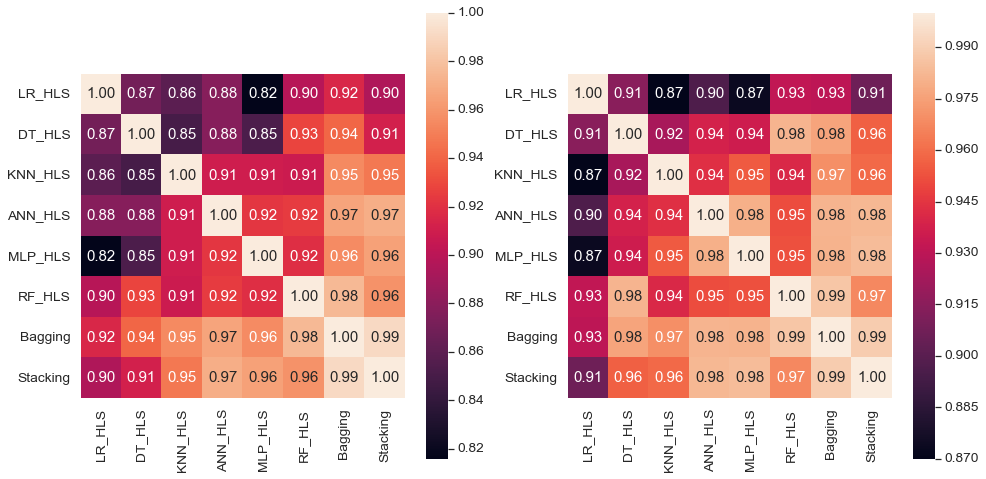

In [387]:
corrmat2= ModelResult.corr()
corrmat3= ModelResult2.corr()

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)

sns.set(font_scale=1.25)

hm = sns.heatmap(corrmat2,cbar=True,square=True,annot=True,fmt=".2f");
hm.set_ylim([ModelResult.shape[1], 0]);

plt.subplot(1,2,2)


sns.set(font_scale=1.25)

hm = sns.heatmap(corrmat3,cbar=True,square=True,annot=True,fmt=".2f");
hm.set_ylim([ModelResult2.shape[1], 0]);

In [414]:
def plot_roc_curve(y_Test, P_learners, labels, title = 'Training dataset (Po2)'):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_learners.shape[1] + 1)]
    
    for i in range(P_learners.shape[1]):
        p = P_learners[:, i]
        fpr, tpr, _ = roc_curve(y_Test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

        
    plt.xlabel('False positive rate',fontsize=14)
    plt.ylabel('True positive rate',fontsize=14)
    plt.title(title,fontsize=18)
    plt.legend(loc = 'lower right',title_fontsize=14,fontsize=14)
    plt.show()

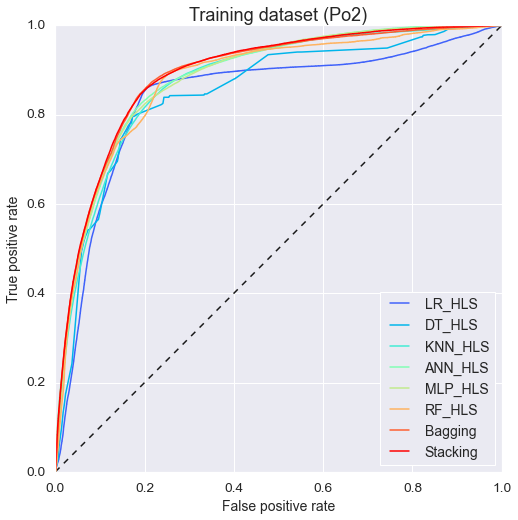

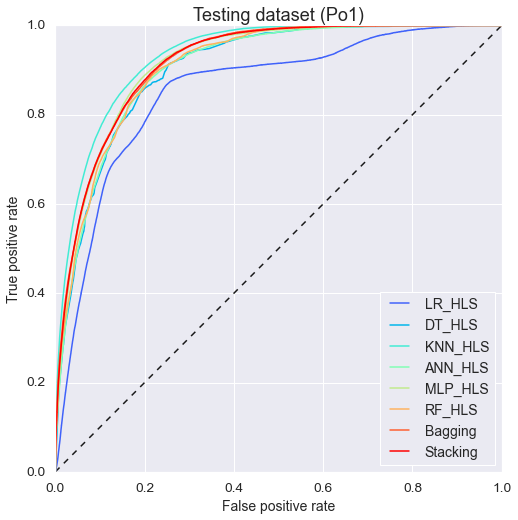

In [415]:
plot_roc_curve(y_Train, ModelResult.values, list(ModelResult.columns),title = 'Training dataset (Po2)')
plot_roc_curve(y_Test, ModelResult2.values, list(ModelResult2.columns),title = 'Testing dataset (Po1)')

## factor importance

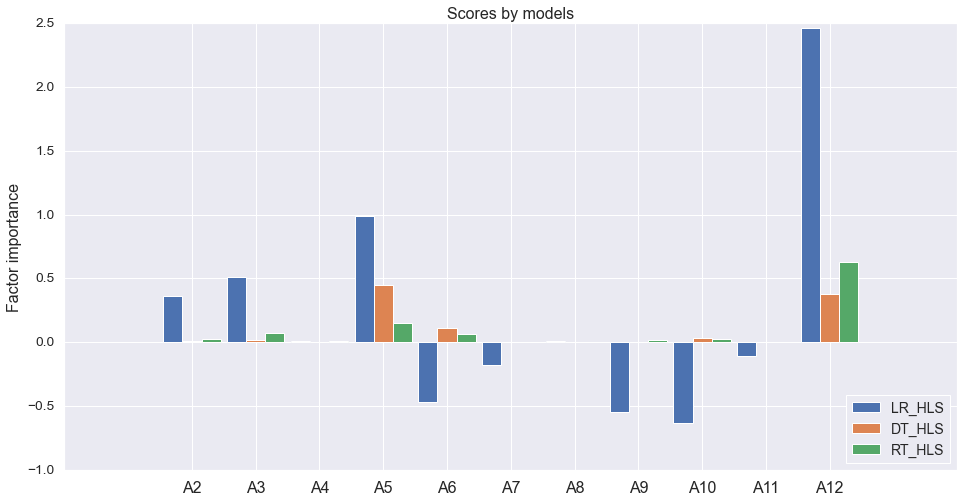

In [464]:
labels = ['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']
LR_HLS_factip =  models['LR_HLS'].coef_.reshape(11,)
DT_HLS_factip =  models['DT_HLS'].feature_importances_.reshape(11,)
RT_HLS_factip =  models['RF_HLS'].feature_importances_.reshape(11,)


x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, LR_HLS_factip , width, label='LR_HLS')
rects2 = ax.bar(x        , DT_HLS_factip , width, label='DT_HLS')
rects2 = ax.bar(x + width, RT_HLS_factip , width, label='RT_HLS')


ax.set_ylabel('Factor importance',fontsize=16)
ax.set_title('Scores by models',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=16)
ax.legend(loc = 'lower right',title_fontsize=14,fontsize=14)    

In [487]:
factip =pd.DataFrame({'LR_HLS' : models['LR_HLS'].coef_.reshape(11,),
                     'DT_HLS' : models['DT_HLS'].feature_importances_.reshape(11,),
                     'RF_HLS' : models['RF_HLS'].feature_importances_.reshape(11,)},
                    index = ['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12'] )

In [491]:
factip

LR_HLS    DT_HLS    RF_HLS
A2   0.359536  0.007442  0.027308
A3   0.514039  0.013976  0.073785
A4   0.010987  0.000000  0.007359
A5   0.986423  0.449462  0.151220
A6  -0.469644  0.108837  0.063241
A7  -0.177563  0.000000  0.000868
A8   0.006055  0.003507  0.000394
A9  -0.544535  0.004206  0.018346
A10 -0.635176  0.029647  0.024578
A11 -0.104522  0.002122  0.004847
A12  2.465803  0.380801  0.628055

# ELS ANALYSIS

## Data processing 

In [493]:
y_els =  All_data['A1']
y_elsp1 = All_dataPo1['A1']
y_elsp2 = All_dataPo2['A1']
y_elsp3 = All_dataPo3['A1']

x_els =  All_data[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20']]
x_elsp1 = All_dataPo1[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20']]
x_elsp2 = All_dataPo2[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20']]
x_elsp3 = All_dataPo3[['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20']]

In [495]:
print("-----------------------before the preprocessing--------------------------------")
Max_Sca = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_els).data_max_
print('The maximun of each columns',Max_Sca)
Min_Sca = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_els).data_min_
print('The minimun of each columns',Min_Sca)


print("-----------------------After the preprocessing--------------------------------")
column_index = x_els.columns
x_els_values = MinMaxScaler(feature_range=(0.1,0.9)).fit_transform(x_els.values)
x_els =pd.DataFrame(x_els_values, columns = column_index) 


Max_Sca_after = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_els).data_max_
print('The maximun of each columns',Max_Sca_after)
Min_Sca_after = MinMaxScaler(feature_range=(0.1,0.9)).fit(x_els).data_min_
print('The minimun of each columns',Min_Sca_after)

-----------------------before the preprocessing--------------------------------
The maximun of each columns [2.000e+01 1.800e+01 1.200e+01 1.016e+03 7.238e+01 3.600e+02 5.975e+01
 1.075e+04 9.000e+03 1.886e+03 3.248e+02 1.004e+03 9.040e+02 1.591e+03
 1.796e+03 6.398e+00 3.952e+04 3.600e+02]
The minimun of each columns [  1.     1.     1.     0.     0.    -1.   -67.56   0.     0.     0.
 206.5  153.2  150.5   69.6  193.     4.31   0.     0.  ]
-----------------------After the preprocessing--------------------------------
The maximun of each columns [0.9    0.9    0.8994 0.9    0.8994 0.9    0.9    0.9    0.9    0.9
 0.9004 0.9    0.8994 0.9004 0.9    0.8994 0.901  0.9   ]
The minimun of each columns [0.1     0.1     0.1     0.1     0.1     0.1     0.09985 0.1     0.1
 0.1     0.0996  0.1     0.1     0.1     0.1     0.0996  0.1     0.1    ]


In [496]:
columns = ['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20']
for i, column_name in enumerate(columns):
    x_elsp1[column_name] = x_elsp1[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))
    x_elsp2[column_name] = x_elsp2[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))
    x_elsp3[column_name] = x_elsp3[column_name].apply(lambda X: 0.1 + 0.8*(X - Min_Sca[i])/(Max_Sca[i]-Min_Sca[i]))

## LR

In [501]:
initial_params ={'penalty':'l2',
                 'random_state':SEED,
                 'verbose':0,
                 'n_jobs':8}

params_test1 = {'solver': ['newton-cg','sag','lbfgs'],
                'C':[1e-5,1e-4,1e-3,1e-2,1e-1,0,0.1,10,100,1000,10000]}
params_test2 = {'tol':[1e-1,3e-1,1e-2,3e-2,1e-3,3e-3,1e-4,3e-4,1e-5,3e-5],
                'max_iter':[100,300,1000,3000,10000]}
                       
               
params_turns = 2

#开始采用贪心算法对参数进行搜索，返回的initial_params为获取的最佳参数
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = LogisticRegression(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_elsp2,y_elsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(LogisticRegression(**initial_params), x_elsp2, y_elsp2, x_elsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_elsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'solver': ['newton-cg', 'sag', 'lbfgs'], 'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0, 0.1, 10, 100, 1000, 10000]}
Start Fiting, params_test1
Wall time: 38.1 s
{'C': 0.0001, 'solver': 'sag'} Best evaluation Scores 0.9165113366700149
This parameter in Testing Dataset AUC score: 0.9246
----------------------Finding Parameters, params_test2 --------------------------
Parameters: params_test2 {'tol': [0.1, 0.3, 0.01, 0.03, 0.001, 0.003, 0.0001, 0.0003, 1e-05, 3e-05], 'max_iter': [100, 300, 1000, 3000, 10000]}
Start Fiting, params_test2
Wall time: 15.6 s
{'max_iter': 100, 'tol': 0.001} Best evaluation Scores 0.9165882733422842
This parameter in Testing Dataset AUC score: 0.9100


## DT

In [502]:
final_result2=[]
final_para2=[]
final_result2.append(df_cv_result)
final_para2.append(initial_params)

In [503]:
initial_params ={'criterion':'gini',
                 'splitter':'best',
                 'random_state':SEED}


params_test1 = {'max_depth': [3,4,5,6,7,8,9,10,20,'None'],
                'min_samples_split':[2,3,4,5,6,7,8,9,10,20,30],
                'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

params_turns = 1

df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = DecisionTreeClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_elsp2,y_elsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(DecisionTreeClassifier(**initial_params), x_elsp2, y_elsp2, x_elsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_elsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 'None'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
Start Fiting, params_test1
Wall time: 5min 46s
{'max_depth': 4, 'max_features': 0.1, 'min_samples_split': 2} Best evaluation Scores 0.8563888721027642
This parameter in Testing Dataset AUC score: 0.9586


In [504]:
final_result2.append(df_cv_result)
final_para2.append(initial_params)

## KNN

In [506]:
initial_params ={'weights':'uniform',
                 'algorithm':'auto'}


params_test1 = {'n_neighbors': [5,10,15,20,25,30,100],
                'metric':['minkowski','euclidean','manhattan']} 

params_turns = 1

#KNeighborsClassifier
df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = KNeighborsClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_elsp2,y_elsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(KNeighborsClassifier(**initial_params), x_elsp2, y_elsp2, x_elsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_elsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'n_neighbors': [5, 10, 15, 20, 25, 30, 100], 'metric': ['minkowski', 'euclidean', 'manhattan']}
Start Fiting, params_test1
Wall time: 6min 50s
{'metric': 'minkowski', 'n_neighbors': 100} Best evaluation Scores 0.7954950464591773
This parameter in Testing Dataset AUC score: 0.9577


In [507]:
final_result2.append(df_cv_result)
final_para2.append(initial_params)

## ANN

In [508]:
initial_params ={'solver':'adam',
                 'learning_rate':'adaptive',
                 'max_iter':2000,
                 'batch_size':200,
                 'early_stopping':True}


params_test1 = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
                'hidden_layer_sizes':[(16,),(32,),(64,),(128,),(256,),(512,)]}

params_turns = 1
# MLPClassifier

df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = MLPClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_elsp2,y_elsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(MLPClassifier(**initial_params), x_elsp2, y_elsp2, x_elsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_elsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(16,), (32,), (64,), (128,), (256,), (512,)]}
Start Fiting, params_test1
Wall time: 15min 2s
{'activation': 'logistic', 'hidden_layer_sizes': (128,)} Best evaluation Scores 0.8691199275047335
This parameter in Testing Dataset AUC score: 0.9510


In [509]:
final_result2.append(df_cv_result)
final_para2.append(initial_params)

In [510]:
initial_params ={'solver':'adam',
                 'learning_rate':'adaptive',
                 'activation':'logistic',
                 'max_iter':2000,
                 'batch_size':200,
                 'early_stopping':True}

params_test1 = {'hidden_layer_sizes':[(128,64),(128,64,32),(128,64,32,16),(128,64,32,16,8)]}

params_turns = 1


df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = MLPClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_elsp2,y_elsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(MLPClassifier(**initial_params), x_elsp2, y_elsp2, x_elsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_elsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'hidden_layer_sizes': [(128, 64), (128, 64, 32), (128, 64, 32, 16), (128, 64, 32, 16, 8)]}
Start Fiting, params_test1
Wall time: 11min 20s
{'hidden_layer_sizes': (128, 64)} Best evaluation Scores 0.8466290183915414
This parameter in Testing Dataset AUC score: 0.9253


In [511]:
final_result2.append(df_cv_result)
final_para2.append(initial_params)

## RF

In [512]:
initial_params ={'criterion':'gini',
                 'random_state':SEED}


params_test1 = {'max_depth': [3,4,5,6,7,8,9,10,20,'None'],
                'min_samples_split':[2,3,4,5,6,7,8,9,10,20,30]}
params_test2 = {'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
params_test3 = {'n_estimators':[100,200,300,400,500,700,1000]}


params_turns = 3


df_cv_result=[]
for i in range(params_turns):
    params_string = "params_test"+str(i+1)
    params_round = locals()[params_string]
    print('----------------------Finding Parameters,',params_string,'--------------------------') 
    print('Parameters:',params_string,params_round)
    
    gsearch = GridSearchCV(estimator = RandomForestClassifier(**initial_params), 
                           param_grid = params_round, scoring='roc_auc',cv=5,n_jobs=9)
    
    print('Start Fiting,',params_string)          
    %time gsearch.fit(x_elsp2,y_elsp2)
    print(gsearch.best_params_,'Best evaluation Scores',gsearch.best_score_)
    
    lr_oof_trainp2, lr_oof_testp2  = get_oof(RandomForestClassifier(**initial_params), x_elsp2, y_elsp2, x_elsp1)
    print("This parameter in Testing Dataset AUC score: %.4f" % roc_auc_score(y_elsp1,lr_oof_testp2))
    
    initial_params.update(gsearch.best_params_)
    
    df_cv_result.append(pd.DataFrame(gsearch.cv_results_))

----------------------Finding Parameters, params_test1 --------------------------
Parameters: params_test1 {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 20, 'None'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30]}
Start Fiting, params_test1
Wall time: 18min 5s
{'max_depth': 4, 'min_samples_split': 30} Best evaluation Scores 0.8892904544909653
This parameter in Testing Dataset AUC score: 0.9800
----------------------Finding Parameters, params_test2 --------------------------
Parameters: params_test2 {'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
Start Fiting, params_test2
Wall time: 2min 36s
{'max_features': 0.1} Best evaluation Scores 0.911141114288333
This parameter in Testing Dataset AUC score: 0.9419
----------------------Finding Parameters, params_test3 --------------------------
Parameters: params_test3 {'n_estimators': [100, 200, 300, 400, 500, 700, 1000]}
Start Fiting, params_test3
Wall time: 1min 55s
{'n_estimators': 200} Best evaluation Scores 0.914634

In [513]:
final_result2.append(df_cv_result)
final_para2.append(initial_params)

## Bagging

In [528]:
LR_Para2 = {'penalty': 'l2',
            'random_state': 42,
            'verbose': 0,
            'n_jobs': 8,
            'C': 0.001,
            'solver': 'sag',
            'max_iter': 100,
            'tol': 0.001}
DT_Para2 = {'criterion': 'gini', 
            'splitter': 'best', 
            'random_state': 42, 
            'max_depth': 5, 
            'max_features': 0.6, 
            'min_samples_split': 2}
KNN_Para2 = {'weights': 'uniform', 
             'algorithm': 'auto', 
             'metric': 'minkowski', 
             'n_neighbors': 100}
ANN_Para2 =  {'solver': 'adam', 
              'learning_rate': 'adaptive', 
              'max_iter': 2000, 
              'batch_size': 200, 
              'early_stopping': True, 
              'activation': 'logistic', 
              'hidden_layer_sizes': (128,)}
MLP_Para2 = {'solver': 'adam',
             'learning_rate': 'adaptive',
             'activation': 'tanh',
             'max_iter': 2000,
             'batch_size': 200,
             'early_stopping': True,
             'hidden_layer_sizes': (128,64)}
RF_Para2 =  {'criterion': 'gini',
             'random_state': 42,
             'max_depth': 4,
             'min_samples_split': 30,
             'max_features': 0.6,
             'n_estimators': 100}


def get_models2():
    LR_ELS_2 = LogisticRegression(**LR_Para2)
    DT_ELS_2 =DecisionTreeClassifier(**DT_Para2)
    KNN_ELS_2= KNeighborsClassifier(**KNN_Para2)
    ANN_ELS_2 = MLPClassifier(**ANN_Para2)
    MLP_ELS_2 = MLPClassifier(**MLP_Para2)
    RF_ELS_2 = RandomForestClassifier(**RF_Para2)
    
    models ={'LR_ELS': LR_ELS_2,
             'DT_ELS': DT_ELS_2,
             'KNN_ELS':KNN_ELS_2,
             'ANN_ELS':ANN_ELS_2,
             'MLP_ELS':MLP_ELS_2,
             'RF_ELS':RF_ELS_2,
            }
    
    return models

In [529]:
aucresult2 = []
models = get_models2()
X_Train = x_elsp2
X_Test = x_elsp1

y_Train =pd.DataFrame(y_elsp2) 
y_Test = pd.DataFrame(y_elsp1) 


Stacking_Train2 = pd.DataFrame(columns = models,index =X_Train.index)
Stacking_Test2 = pd.DataFrame(columns = models,index =X_Test.index)


for m in models:
    M1_oof_train, M1_oof_test = get_oof(models[m], X_Train, y_Train, X_Test)
    print(m,"Model K-Fold AUC Train score: %.4f  " % roc_auc_score(y_Train,pd.DataFrame(M1_oof_train,index=y_Train.index)),end='')
    print(m,"Model K-Fold AUC Test score: %.4f" % roc_auc_score(y_Test['A1'],pd.DataFrame(M1_oof_test,index=y_Test.index)))
    aucresult1.append(roc_auc_score(y_Test['A1'],pd.DataFrame(M1_oof_test,index=y_Test.index)))
    Stacking_Train2[m] =  M1_oof_train.ravel()
    Stacking_Test2[m] = M1_oof_test.ravel()

LR_ELS Model K-Fold AUC Train score: 0.8462  LR_ELS Model K-Fold AUC Test score: 0.9138
DT_ELS Model K-Fold AUC Train score: 0.8394  DT_ELS Model K-Fold AUC Test score: 0.9373
KNN_ELS Model K-Fold AUC Train score: 0.8956  KNN_ELS Model K-Fold AUC Test score: 0.9534
ANN_ELS Model K-Fold AUC Train score: 0.8849  ANN_ELS Model K-Fold AUC Test score: 0.9313
MLP_ELS Model K-Fold AUC Train score: 0.8899  MLP_ELS Model K-Fold AUC Test score: 0.9569
RF_ELS Model K-Fold AUC Train score: 0.8856  RF_ELS Model K-Fold AUC Test score: 0.9440


In [531]:
Stacking = LogisticRegression().fit(Stacking_Train2,y_Train)
print('Bagging training AUC score: %.4f' % roc_auc_score(y_Train,Stacking_Train2.mean(axis=1)),end='')
print("  test AUC score: %.4f" % roc_auc_score(y_Test['A1'],Stacking_Test2.mean(axis=1)))
print("LR stacking training AUC score: %.4f" % roc_auc_score(y_Train,Stacking.predict_proba(Stacking_Train2)[:,1]),end='')
print("  test AUC score: %.4f" % roc_auc_score(y_Test['A1'],Stacking.predict_proba(Stacking_Test2)[:,1]))

Bagging training AUC score: 0.9042  test AUC score: 0.9519
LR stacking training AUC score: 0.9055  test AUC score: 0.9498


## Picture

In [534]:
ModelResult3 = Stacking_Train2.copy()
ModelResult3['Bagging2'] = Stacking_Train2.mean(axis=1)
ModelResult3['Stacking2'] =Stacking.predict_proba(Stacking_Train2)[:,1]

ModelResult4 = Stacking_Test2.copy()
ModelResult4['Bagging2'] = Stacking_Test2.mean(axis=1)
ModelResult4['Stacking2'] =Stacking.predict_proba(Stacking_Test2)[:,1]

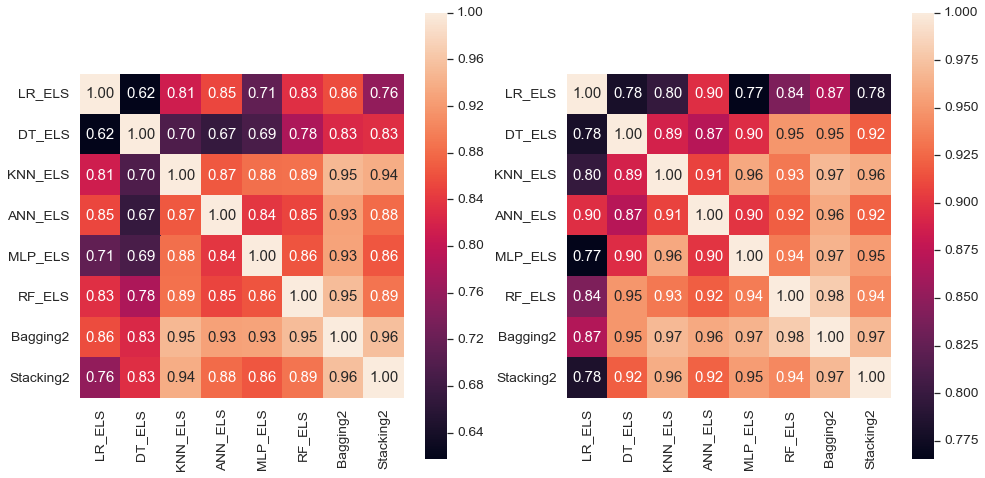

In [535]:
corrmat4= ModelResult3.corr()
corrmat5= ModelResult4.corr()

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.set(font_scale=1.25)

hm = sns.heatmap(corrmat4,cbar=True,square=True,annot=True,fmt=".2f");
hm.set_ylim([ModelResult3.shape[1], 0]);

plt.subplot(1,2,2)


sns.set(font_scale=1.25)

hm = sns.heatmap(corrmat5,cbar=True,square=True,annot=True,fmt=".2f");
hm.set_ylim([ModelResult4.shape[1], 0]);

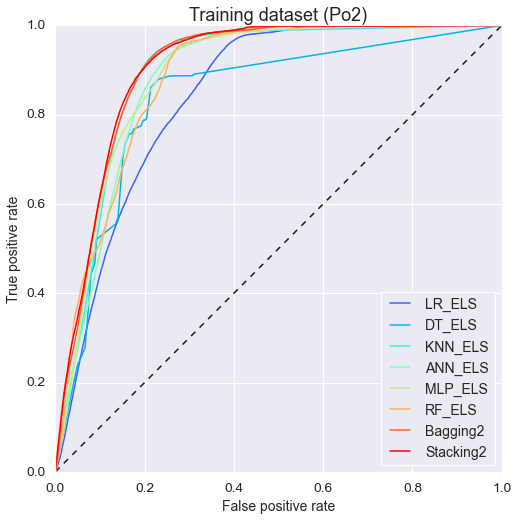

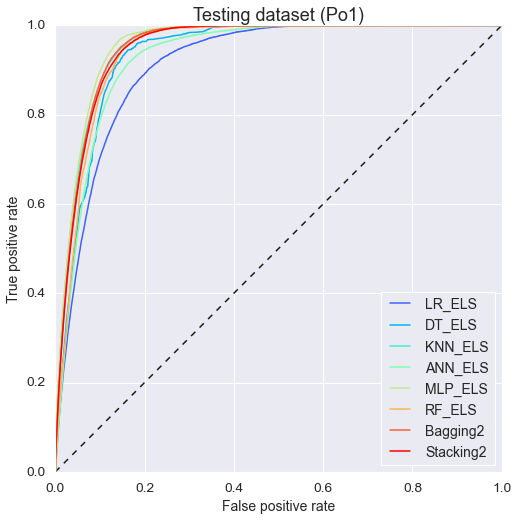

In [538]:
plot_roc_curve(y_Train, ModelResult3.values, list(ModelResult3.columns),title = 'Training dataset (Po2)')
plot_roc_curve(y_Test, ModelResult4.values, list(ModelResult4.columns),title = 'Testing dataset (Po1)')

In [540]:
factip =pd.DataFrame({'LR_ELS' : models['LR_ELS'].coef_.reshape(18,),
                     'DT_ELS' : models['DT_ELS'].feature_importances_.reshape(18,),
                     'RF_ELS' : models['RF_ELS'].feature_importances_.reshape(18,)},
                    index = ['A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A13','A14','A15','A16','A17','A18','A19','A20'] )

In [576]:
ModelResult4['X'] = All_dataPo1['XCoord']
ModelResult4['Y'] = All_dataPo1['YCoord']
ModelResult4['HLS'] = All_dataPo1['A0']
ModelResult4['ELS'] = All_dataPo1['A1']

## LSM

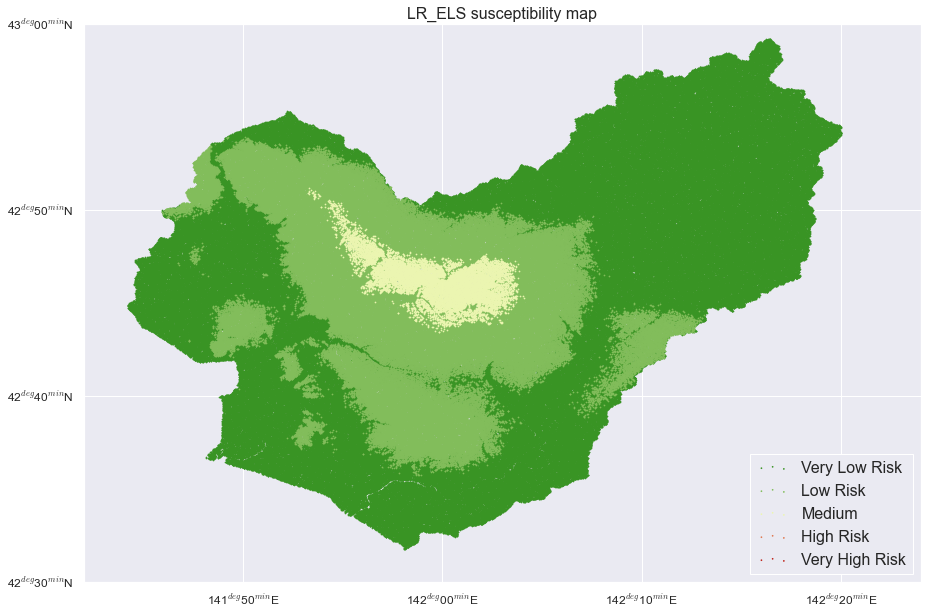

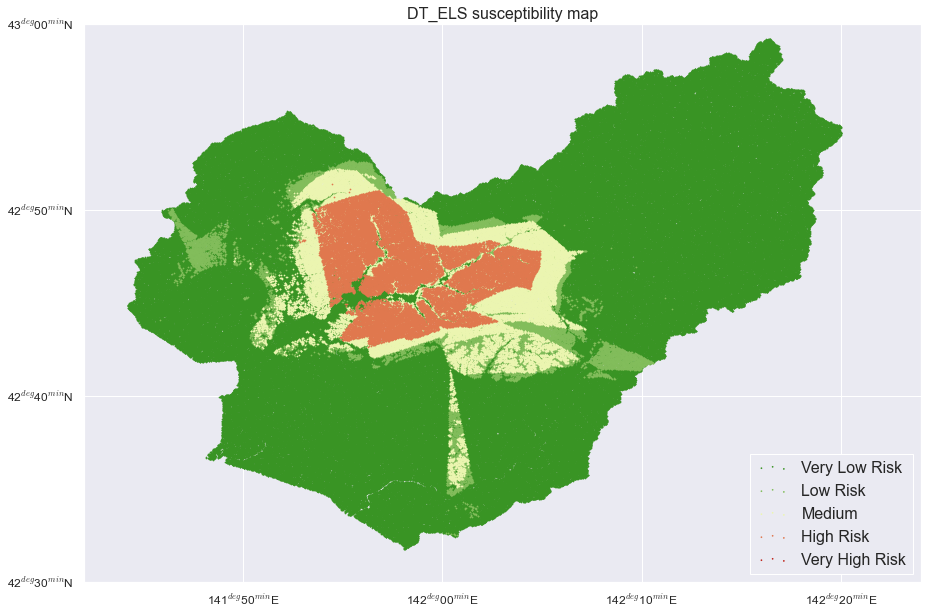

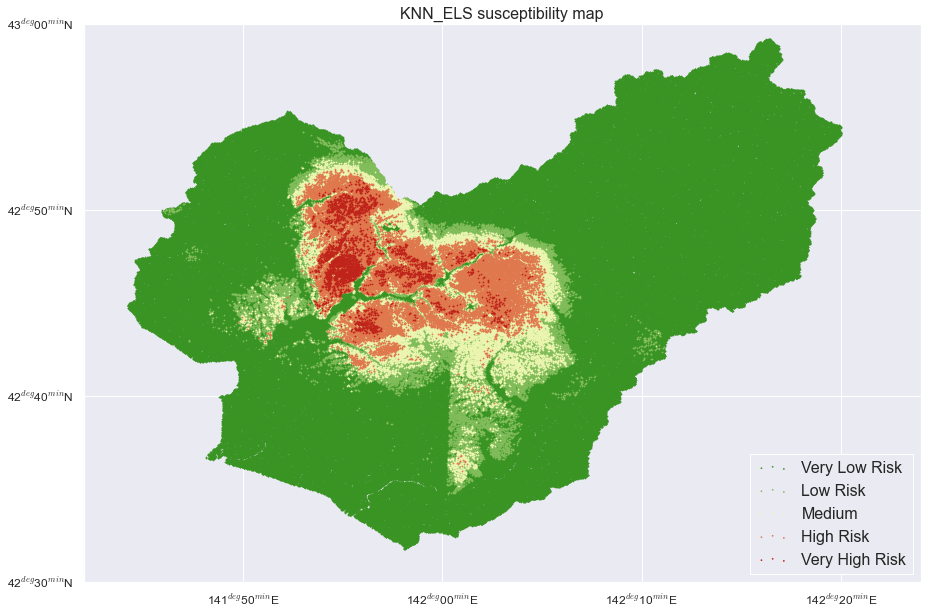

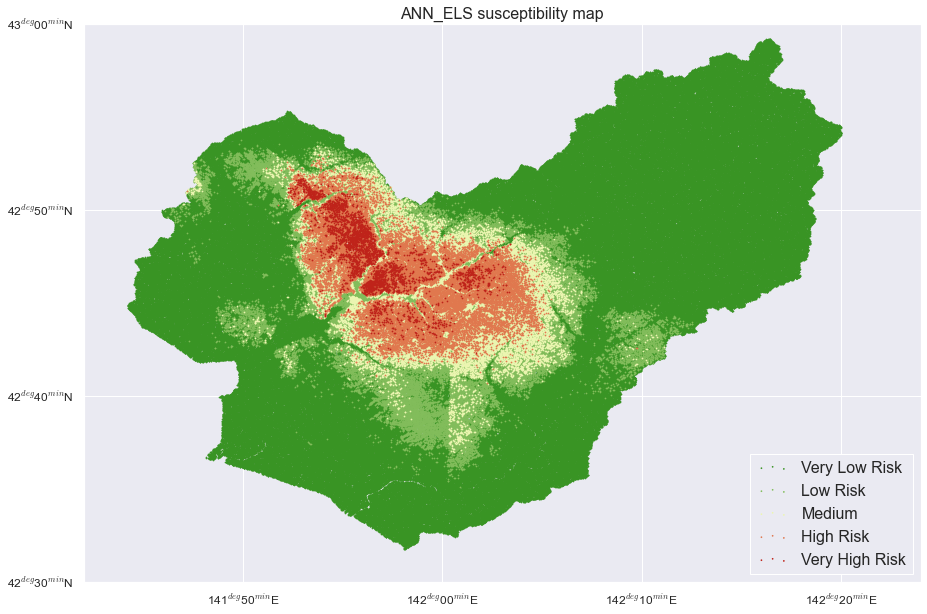

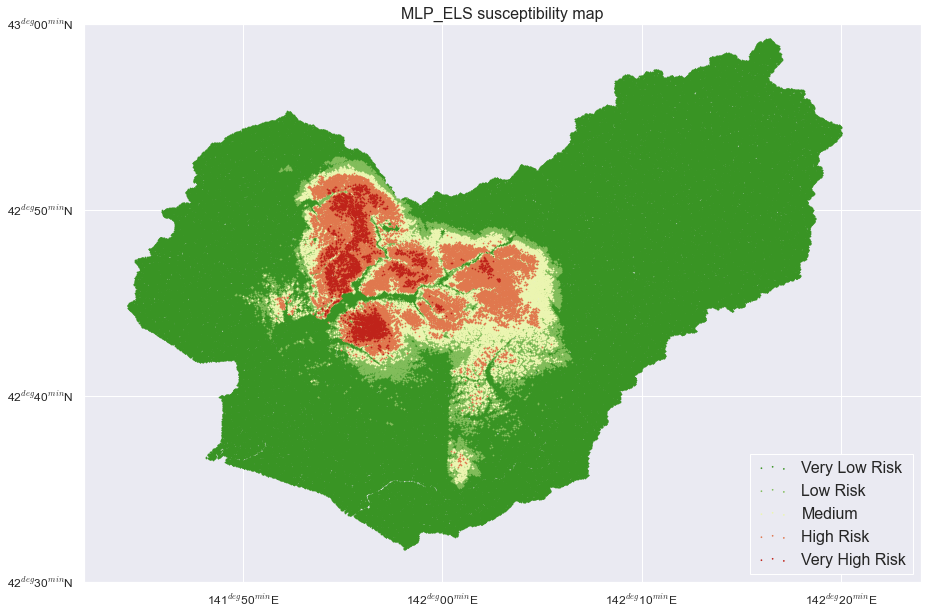

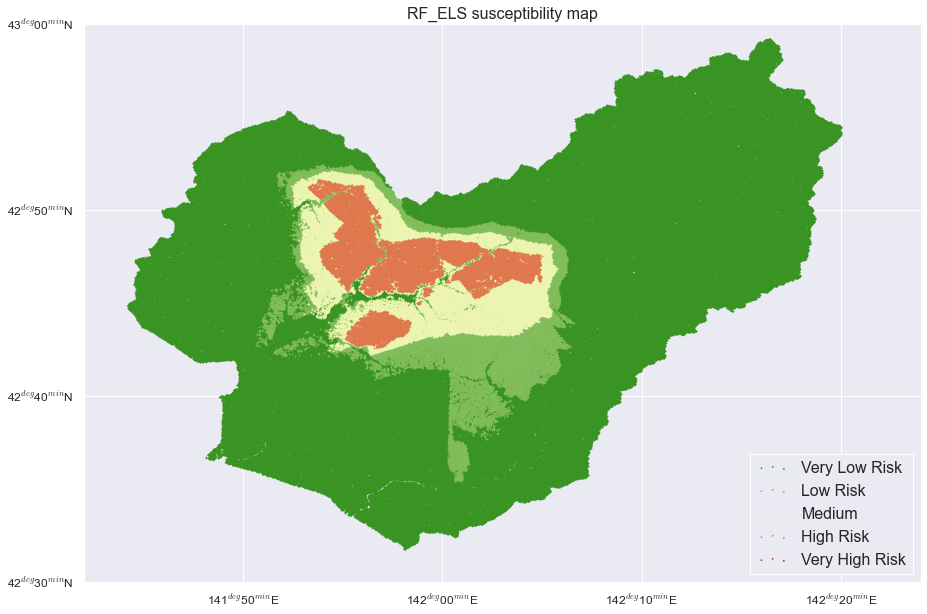

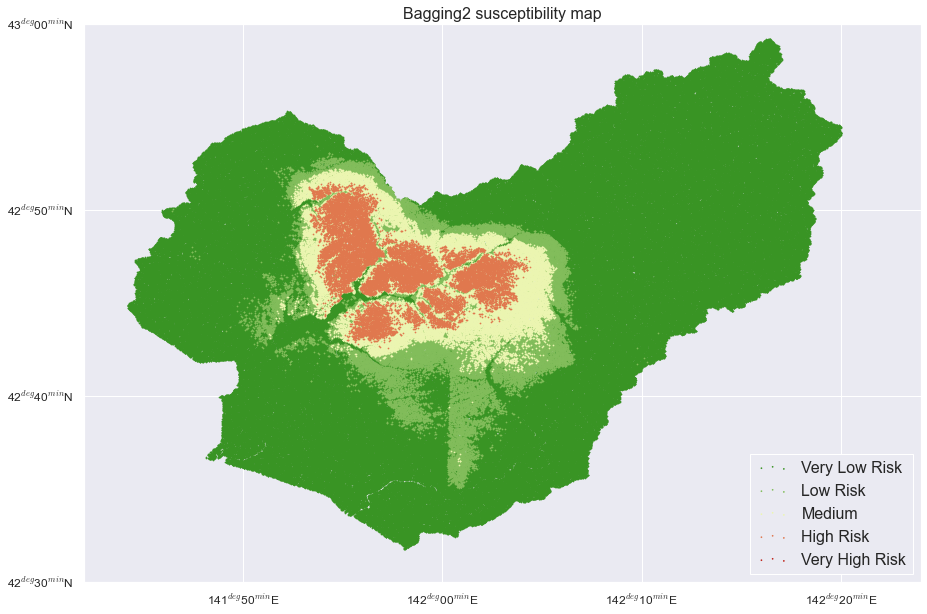

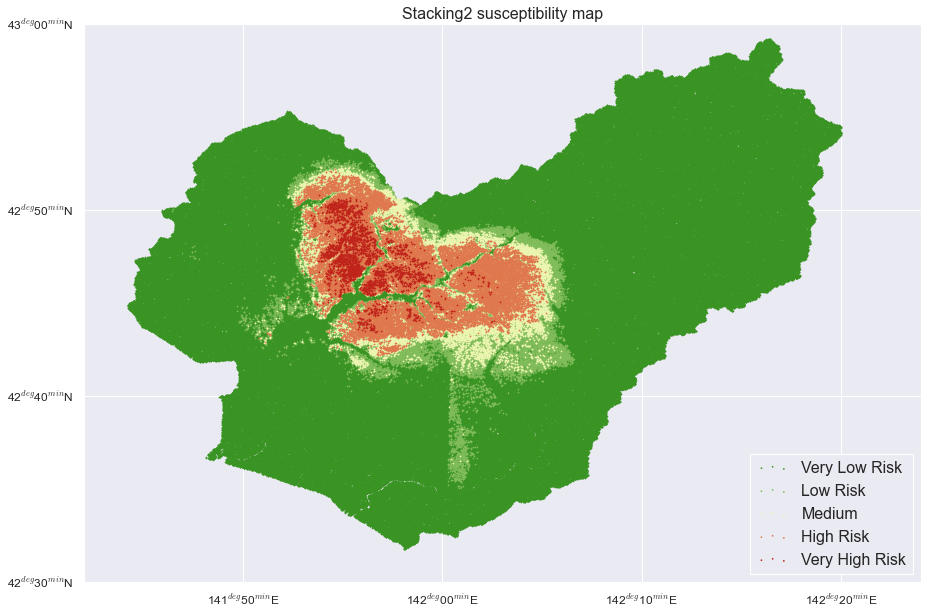

In [607]:
Labelvalues = ['Very Low Risk','Low Risk','Medium','High Risk','Very High Risk']
ColorLabel = ['#399424','#82BD5B','#ECF6B1','#E0784E','#BF231A']
bins = [-0.1,0.2,0.4,0.6,0.8,1.0]
TargetModel2 = ['LR_ELS','DT_ELS','KNN_ELS','ANN_ELS','MLP_ELS','RF_ELS','Bagging2','Stacking2']

for i in TargetModel2:
    ModelResult4['ELS_Risk'] = pd.cut(ModelResult4[i],bins,labels=['Very Low Risk','Low Risk',
                                                                      'Medium','High Risk','Very High Risk']) 

    plot_map_point(ModelResult4,Labelvalues,Labelvalues,ColorLabel,var='ELS_Risk',titles = i)
    

In [606]:
def plot_map_point(Data,Labelvalues,Labletext,ColorLabel,var='A1',titles='Susceptibility map'):
    
    plt.figure(figsize=(15,10))
    
    for i in range(len(Labelvalues)):
        temp = Data[Data[var]==Labelvalues[i]]
        plt.scatter(temp['X'],temp['Y'],marker='o',color =ColorLabel[i] ,label=Labletext[i],s=0.5)
    
    plt.xticks(np.linspace(141.5,142.5,7),
           ['141$^{deg}$30$^{min}$E','141$^{deg}$40$^{min}$E','141$^{deg}$50$^{min}$E',
            '142$^{deg}$00$^{min}$E','142$^{deg}$10$^{min}$E','142$^{deg}$20$^{min}$E','142$^{deg}$30$^{min}$E'],fontsize=12);
    plt.xlim(141.7,142.4)

    plt.ylim(42.5,43.0)
    plt.yticks(np.linspace(42.5,43.0,4),
           ['42$^{deg}$30$^{min}$N','42$^{deg}$40$^{min}$N','42$^{deg}$50$^{min}$N','43$^{deg}$00$^{min}$N'],fontsize=12);

    plt.legend(loc = 'lower right',fontsize=16);
    plt.title(titles+' susceptibility map',fontsize=16)
    plt.show()